In [1]:
import os
import pandas as pd
import numpy as np
from src.signals.ppg import PPGSubject
from src.signals.eeg import EEGSubject, EEGExperiment
from src.signals.subject import Subject
from src.signals.eda import EDAExperiment
from src.signals.ppg import PPGExperiment
from src.experiments.experiment import ExperimentType, Experiment
from math import sqrt, log10
# from src.classifiers.hyperparameters import Hyperparameters
from src.classifiers.tuning.index import Tuner
# from src.signals.eda import 
import scipy.stats as stats
from src.classifiers.svm import Svm
from src.classifiers.xgb import Xgb
from src.classifiers.knn import Knn
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from matplotlib import pyplot as plt
from xgboost import XGBClassifier

path = os.getcwd()
survey_path = "{0}/survey_gamification".format(os.getcwd())

2024-10-04 20:57:25.215972: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-10-04 20:57:25.216464: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-04 20:57:25.218873: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-04 20:57:25.225181: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-04 20:57:25.235983: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been 

In [3]:
ppg = PPGSubject(path=survey_path, id="11", device="samsung", sensor="ppg", experiment_type=ExperimentType.FEATURE_ENGINEERING)
emp = PPGSubject(path=survey_path, id="11", device="empatica", sensor="ppg", experiment_type=ExperimentType.)
# eda = Subject(path=survey_path, id="11", device="empatica", sensor="eda")
# eeg =  EEGSubject(path=survey_path, id="11", device="", sensor="")

SyntaxError: invalid syntax (1994639524.py, line 2)

In [10]:
fee = PPGExperiment(classifier='xgb', type=ExperimentType.FEATURE_ENGINEERING, path=path, device='samsung')
tuner = Tuner(fee)

In [7]:
fee.losocv_path

'/home/mateus/Documents/school/tcc/code/results_30/FEATURE_ENGINEERING/samsung_ppg/losocv/knn'

In [12]:
tuner.tune(evals=39, max_evals=40)
tuner.best_hyperparameters()

2024-10-04 20:59:28,087 [INFO] loaded existing trials
2024-10-04 20:59:28,089 [INFO] trials length: 39


 98%|█████████▊| 39/40 [00:00<?, ?trial/s, best loss=?]

2024-10-04 20:59:28,112 [INFO] Running objective for xgb at 39 iteration
2024-10-04 20:59:28,211 [INFO] Experiment for ppg signal, classifier: xgb, fold: 0


hyperparameters: {'colsample_bylevel': 0.7757289547896282, 'colsample_bynode': 0.8095097942363317, 'colsample_bytree': 0.7270783699579382, 'eta': 0.6332750849132656, 'eval_metric': 'logloss', 'gamma': 92.7286457097519, 'max_delta_step': 8, 'max_depth': 13, 'min_child_weight': 5, 'n_estimators': 370, 'objective': 'binary:logistic', 'reg_alpha': 8.965459941966813, 'reg_lambda': 0.47843490528732446, 'seed': 42, 'subsample': 0.292193620629402}
 98%|█████████▊| 39/40 [00:00<?, ?trial/s, best loss=?]

2024-10-04 20:59:28,279 [INFO] Finished experiment for ppg signal, classifier: xgb, fold: 0


100%|██████████| 40/40 [00:00<00:00,  3.56trial/s, best loss: 3.304001560669072]

2024-10-04 20:59:28,382 [INFO] loaded existing trials


{'colsample_bylevel': 0.9241749682365211,
 'colsample_bynode': 0.9682202826377452,
 'colsample_bytree': 0.6246964309147626,
 'eta': 0.1458692963034246,
 'eval_metric': 'rmse',
 'gamma': 65.01181259128872,
 'max_delta_step': 9,
 'max_depth': 9,
 'min_child_weight': 9,
 'n_estimators': 70,
 'objective': 'binary:logistic',
 'reg_alpha': 5.163160371387308,
 'reg_lambda': 0.8039420183560784,
 'seed': 42,
 'subsample': 0.38759065865865816}

In [5]:
clf = Knn()

In [13]:
clf = Xgb()

In [14]:
clf = Svm()

In [14]:
clf.cv_train(fee, tuner.best_hyperparameters())

2024-10-04 20:59:32,227 [INFO] loaded existing trials


hyperparameters: {'colsample_bylevel': 0.9241749682365211, 'colsample_bynode': 0.9682202826377452, 'colsample_bytree': 0.6246964309147626, 'eta': 0.1458692963034246, 'eval_metric': 'rmse', 'gamma': 65.01181259128872, 'max_delta_step': 9, 'max_depth': 9, 'min_child_weight': 9, 'n_estimators': 70, 'objective': 'binary:logistic', 'reg_alpha': 5.163160371387308, 'reg_lambda': 0.8039420183560784, 'seed': 42, 'subsample': 0.38759065865865816}
hyperparameters: {'colsample_bylevel': 0.9241749682365211, 'colsample_bynode': 0.9682202826377452, 'colsample_bytree': 0.6246964309147626, 'eta': 0.1458692963034246, 'eval_metric': 'rmse', 'gamma': 65.01181259128872, 'max_delta_step': 9, 'max_depth': 9, 'min_child_weight': 9, 'n_estimators': 70, 'objective': 'binary:logistic', 'reg_alpha': 5.163160371387308, 'reg_lambda': 0.8039420183560784, 'seed': 42, 'subsample': 0.38759065865865816}
hyperparameters: {'colsample_bylevel': 0.9241749682365211, 'colsample_bynode': 0.9682202826377452, 'colsample_bytree':

In [ ]:
clf.predict(fee)

   precision    recall  duration        f1
0   0.697882  0.636179  0.000846  0.665603
   precision    recall  duration        f1
0   0.706938  0.900915  0.013566  0.792225
   precision    recall  duration        f1
0   0.702013  0.726626  0.015683  0.714107
   precision    recall  duration        f1
0   0.694124  0.672256  0.014676  0.683015
   precision    recall  duration        f1
0   0.713058  0.843496  0.014318  0.772812
   precision    recall  duration        f1
0   0.719264  0.933435  0.013541  0.812472
   precision    recall  duration        f1
0   0.696707  0.817073  0.018671  0.752105
   precision    recall  duration        f1
0   0.711456  0.839431  0.013679  0.770163
   precision    recall  duration        f1
0   0.693831  0.925813  0.010563  0.793209
   precision    recall  duration        f1
0    0.70654  0.867378  0.017192  0.778741


In [ ]:
fee.run_once(tuner.best_hyperparameters)

In [4]:
def test_values(experiment):
  x_test = np.concatenate([s.x() for s in experiment.test_subjects])
  y_test = np.concatenate([s.y() for s in experiment.test_subjects])

  cols = x_test.shape[-1:][0]
  x_test = np.reshape(x_test, (1, -1, cols))[0]
  y_test = np.reshape(y_test, (1, -1))[0]
  return x_test, y_test

In [9]:
x_test = np.concatenate([s.x() for s in fee.test_subjects])

In [8]:
x_test.shape

(109, 30, 9)

In [5]:
for s in cnn.test_subjects:
  print(s.id)

print('')
for s in cnn.splits:
  ids = [v.id for v in s.train]
  print(f'{s.id} => {ids} v: {[v.id for v in s.val]} t: {[v.id for v in s.test]}')


22
23
24

11 => ['12', '13', '15', '16', '17', '18', '20', '21'] v: ['14'] t: ['11']
12 => ['11', '14', '15', '16', '17', '18', '20', '21'] v: ['13'] t: ['12']
13 => ['11', '12', '14', '15', '16', '17', '18', '21'] v: ['20'] t: ['13']
14 => ['11', '12', '13', '15', '16', '17', '18', '20'] v: ['21'] t: ['14']
15 => ['11', '12', '13', '14', '16', '17', '18', '20'] v: ['21'] t: ['15']
16 => ['11', '12', '13', '14', '15', '17', '18', '20'] v: ['21'] t: ['16']
17 => ['11', '12', '13', '15', '16', '18', '20', '21'] v: ['14'] t: ['17']
18 => ['11', '12', '13', '14', '15', '16', '17', '20'] v: ['21'] t: ['18']
20 => ['11', '13', '14', '15', '16', '17', '18', '21'] v: ['12'] t: ['20']
21 => ['11', '12', '13', '14', '15', '16', '17', '20'] v: ['18'] t: ['21']


In [7]:
c_svm = svm.SVC(cnn)
c_knn = KNeighborsClassifier(n_neighbors=3)
c_xgb = XGBClassifier(n_estimators=3, max_depth=3, learning_rate=1, objective='binary:logistic')

In [11]:
sms_preds = {}
emp_preds = {}
xgb_preds = {}

In [5]:
s = fee.splits[0]
X = np.concatenate([s.x_train(), s.x_val()])
y = np.concatenate([s.y_train(), s.y_val()])

cols = X.shape[-1:][0]
X = np.reshape(X, (1, -1, cols))[0]
y = np.reshape(y, (1, -1))[0]



In [8]:
c_svm.fit(X, y)

SVC()

In [11]:
c_svm.

(8340, 9)

In [23]:
def cv_train(experiment, x_test, y_test, preds_dict, clf_builder):
  X = []
  y = []
  for s in experiment.splits:
    X = np.concatenate([s.x_train(), s.x_val()])
    y = np.concatenate([s.y_train(), s.y_val()])

    cols = X.shape[-1:][0]
    X = np.reshape(X, (1, -1, cols))[0]
    y = np.reshape(y, (1, -1))[0]

    clf = clf_builder()
    clf.fit(X, y)
    y_pred = clf.predict(x_test)
    preds_dict[s.id] = {
      'y_pred': y_pred,
      'y_true': y_test
    }


In [14]:
def show_results(y_preds):
  for x in y_preds:
    print(f'Subject {x}')
    y_true = y_preds[x]['y_true']
    y_pred = y_preds[x]['y_pred']
    print(classification_report(y_pred,y_true))

    plt.figure(figsize=(16, 8))
    plt.plot(y_true, 'b-', y_pred, 'r.')
    plt.show()

In [13]:
xgbx, xgby = test_values(fee)

In [15]:
xgbx.shape

(3270, 9)

In [18]:
def damn():
  print('damn')
  return XGBClassifier(n_estimators=3, max_depth=1, learning_rate=1, objective='binary:logistic')

In [24]:
cv_train(fee, xgbx, xgby, xgb_preds, damn)

X initial shape: (278, 30, 9)
X reshape: (8340, 9)
damn
X initial shape: (267, 30, 9)
X reshape: (8010, 9)
damn
X initial shape: (270, 30, 9)
X reshape: (8100, 9)
damn
X initial shape: (277, 30, 9)
X reshape: (8310, 9)
damn
X initial shape: (274, 30, 9)
X reshape: (8220, 9)
damn
X initial shape: (278, 30, 9)
X reshape: (8340, 9)
damn
X initial shape: (264, 30, 9)
X reshape: (7920, 9)
damn
X initial shape: (261, 30, 9)
X reshape: (7830, 9)
damn
X initial shape: (287, 30, 9)
X reshape: (8610, 9)
damn
X initial shape: (289, 30, 9)
X reshape: (8670, 9)
damn


Subject 11
              precision    recall  f1-score   support

           0       0.62      0.51      0.56      1576
           1       0.61      0.71      0.65      1694

    accuracy                           0.61      3270
   macro avg       0.61      0.61      0.61      3270
weighted avg       0.61      0.61      0.61      3270



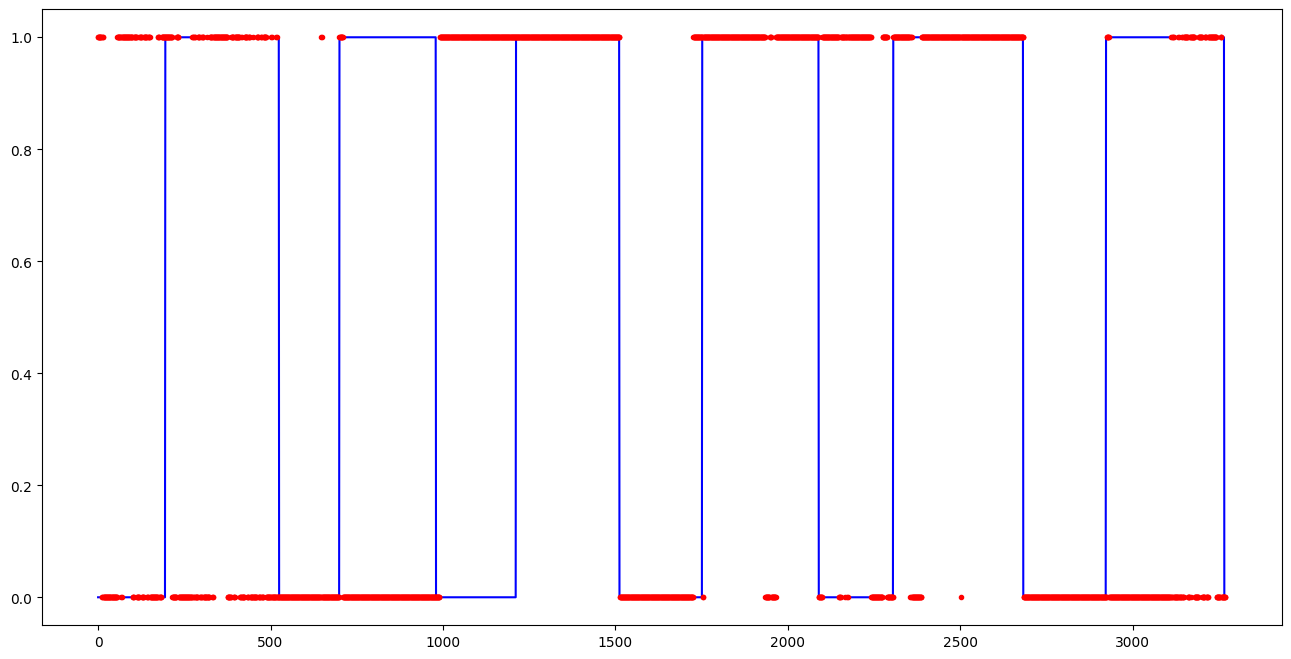

Subject 12
              precision    recall  f1-score   support

           0       0.62      0.50      0.56      1595
           1       0.60      0.70      0.65      1675

    accuracy                           0.61      3270
   macro avg       0.61      0.60      0.60      3270
weighted avg       0.61      0.61      0.60      3270



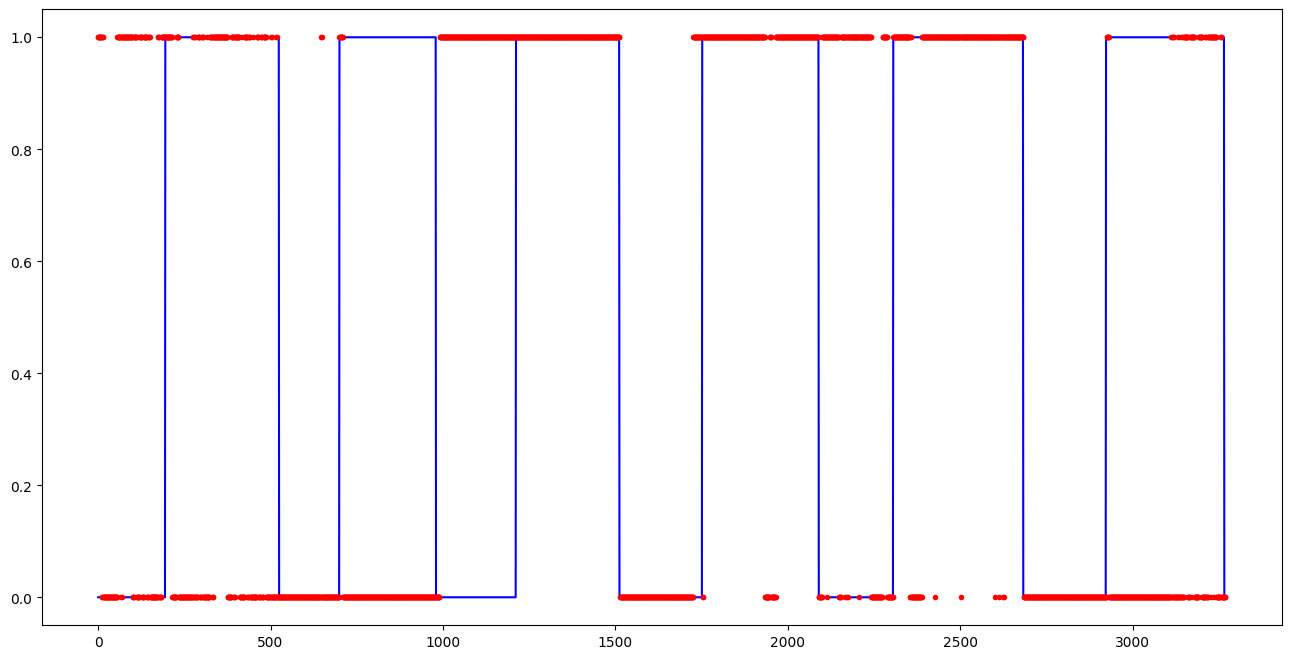

Subject 13
              precision    recall  f1-score   support

           0       0.63      0.49      0.56      1669
           1       0.57      0.70      0.63      1601

    accuracy                           0.60      3270
   macro avg       0.60      0.60      0.59      3270
weighted avg       0.60      0.60      0.59      3270



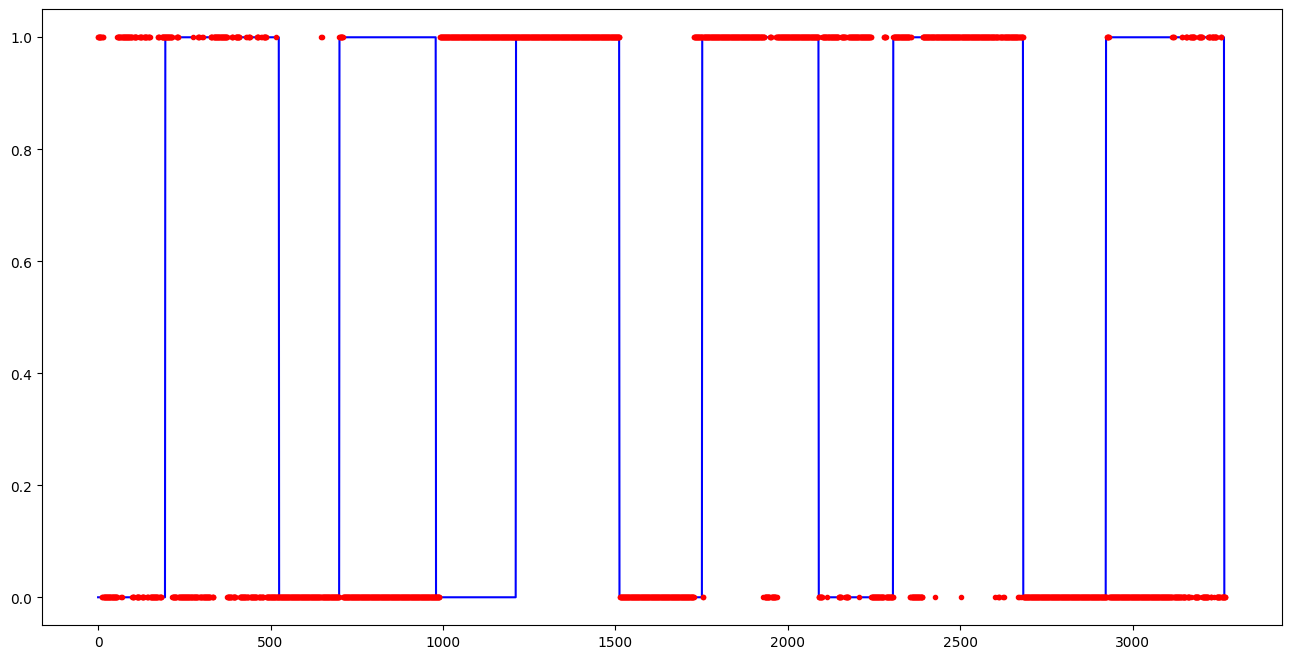

Subject 14
              precision    recall  f1-score   support

           0       0.62      0.51      0.56      1588
           1       0.60      0.70      0.65      1682

    accuracy                           0.61      3270
   macro avg       0.61      0.60      0.60      3270
weighted avg       0.61      0.61      0.60      3270



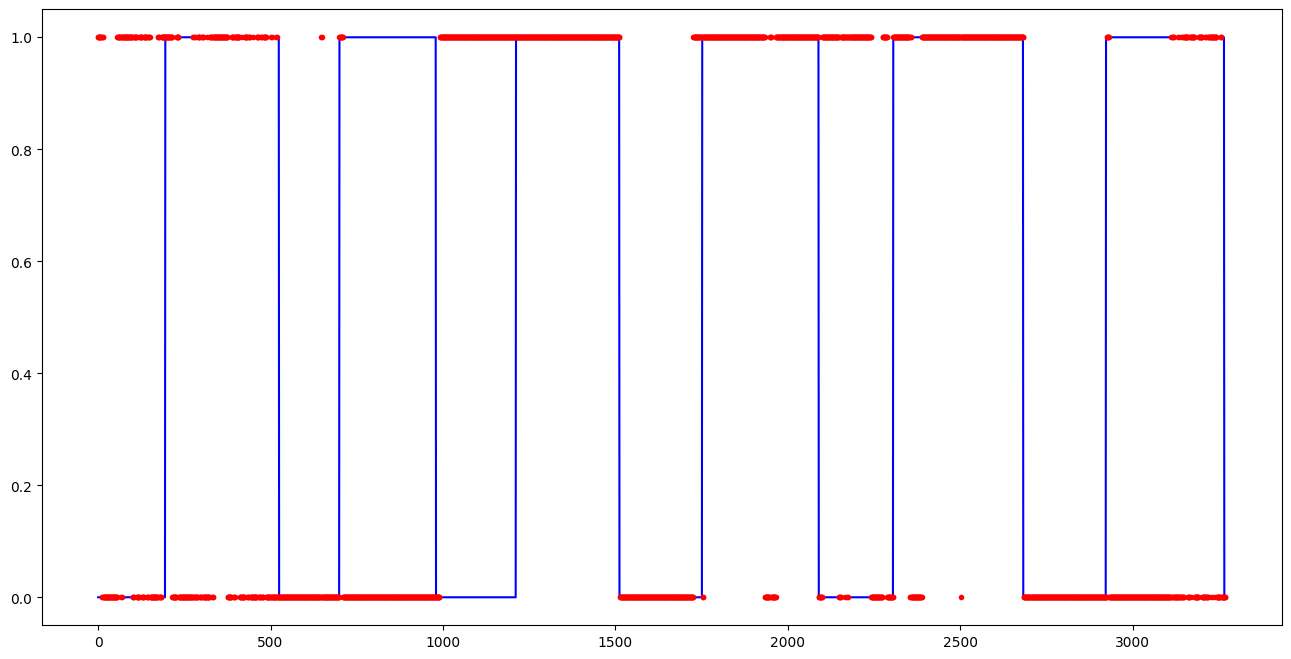

Subject 15
              precision    recall  f1-score   support

           0       0.59      0.51      0.55      1514
           1       0.62      0.70      0.66      1756

    accuracy                           0.61      3270
   macro avg       0.61      0.60      0.60      3270
weighted avg       0.61      0.61      0.61      3270



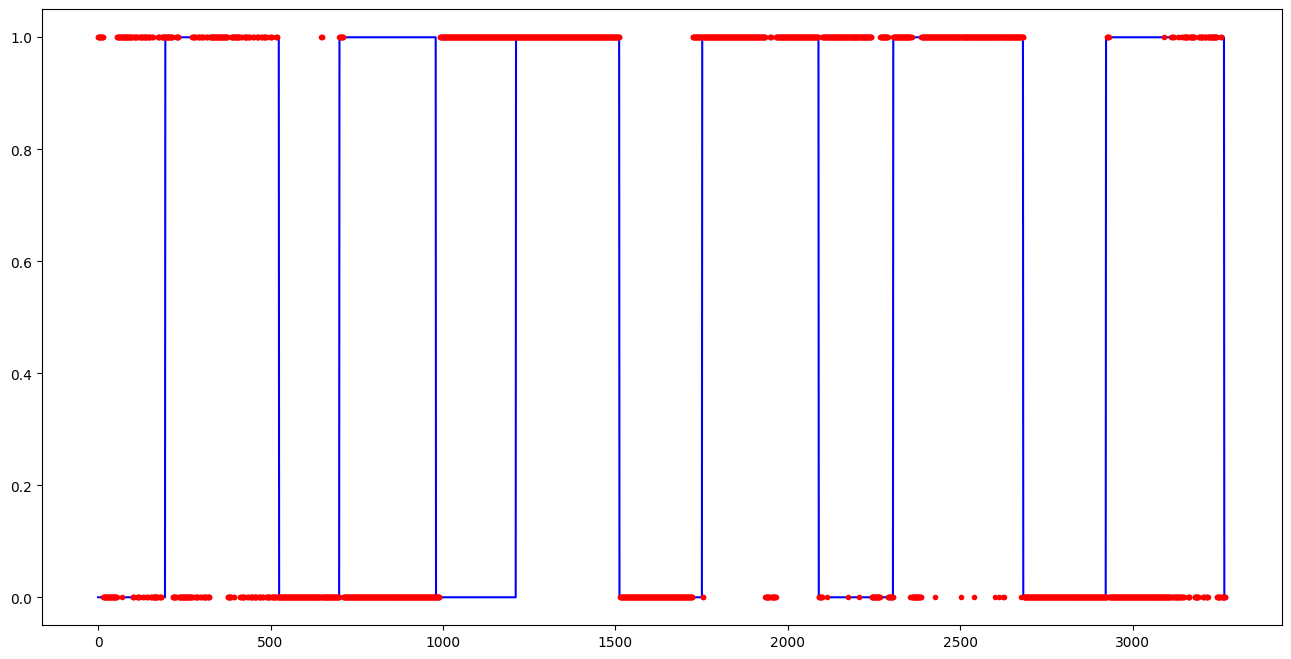

Subject 16
              precision    recall  f1-score   support

           0       0.57      0.53      0.55      1407
           1       0.66      0.70      0.68      1863

    accuracy                           0.62      3270
   macro avg       0.61      0.61      0.61      3270
weighted avg       0.62      0.62      0.62      3270



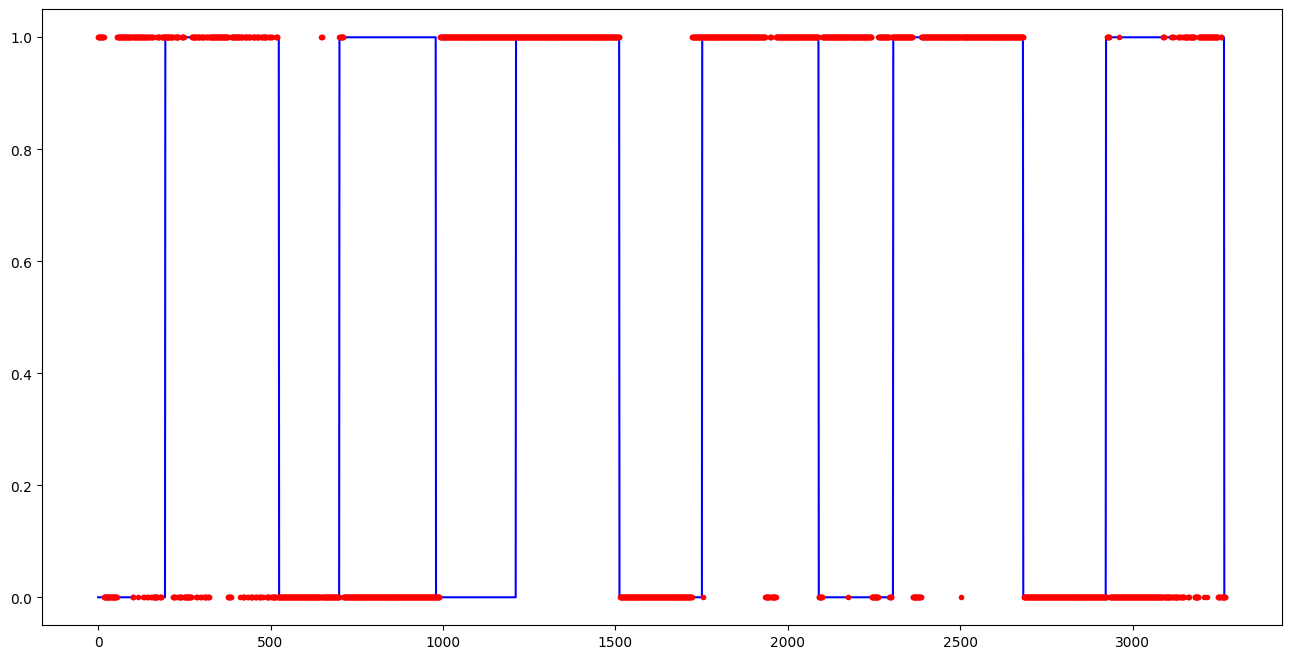

Subject 17
              precision    recall  f1-score   support

           0       0.20      0.84      0.33       314
           1       0.97      0.65      0.78      2956

    accuracy                           0.67      3270
   macro avg       0.59      0.74      0.55      3270
weighted avg       0.90      0.67      0.74      3270



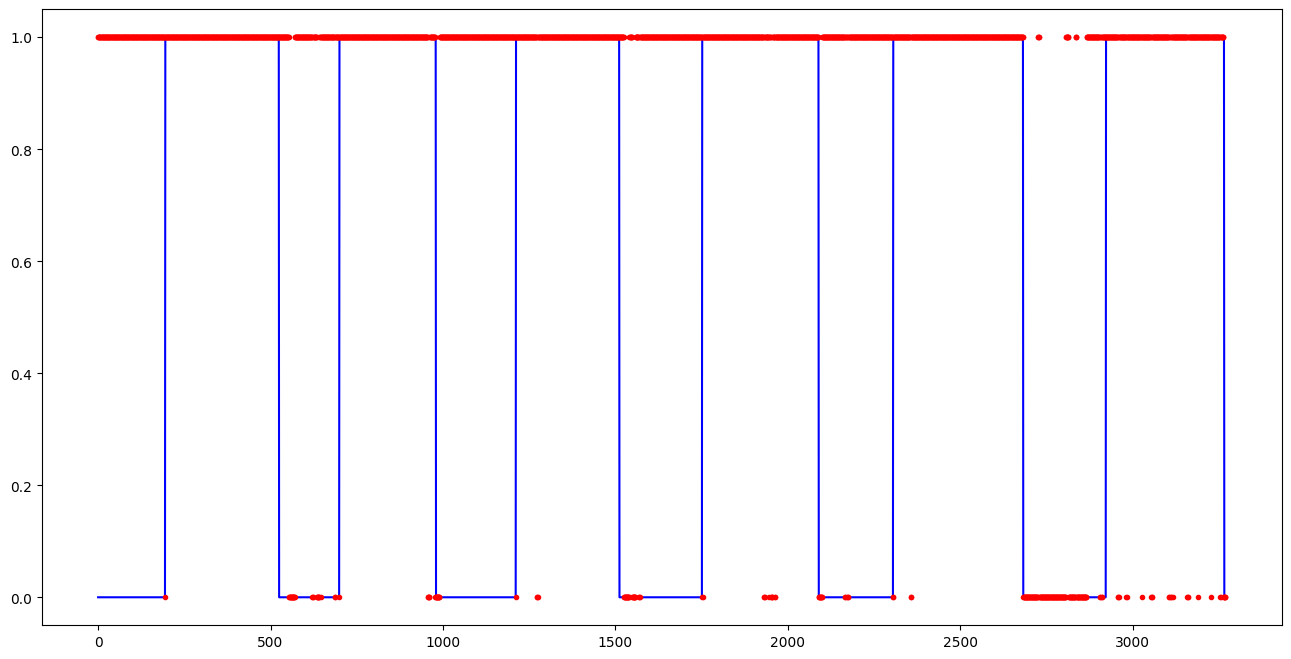

Subject 18
              precision    recall  f1-score   support

           0       0.56      0.53      0.55      1372
           1       0.67      0.70      0.69      1898

    accuracy                           0.63      3270
   macro avg       0.62      0.61      0.62      3270
weighted avg       0.63      0.63      0.63      3270



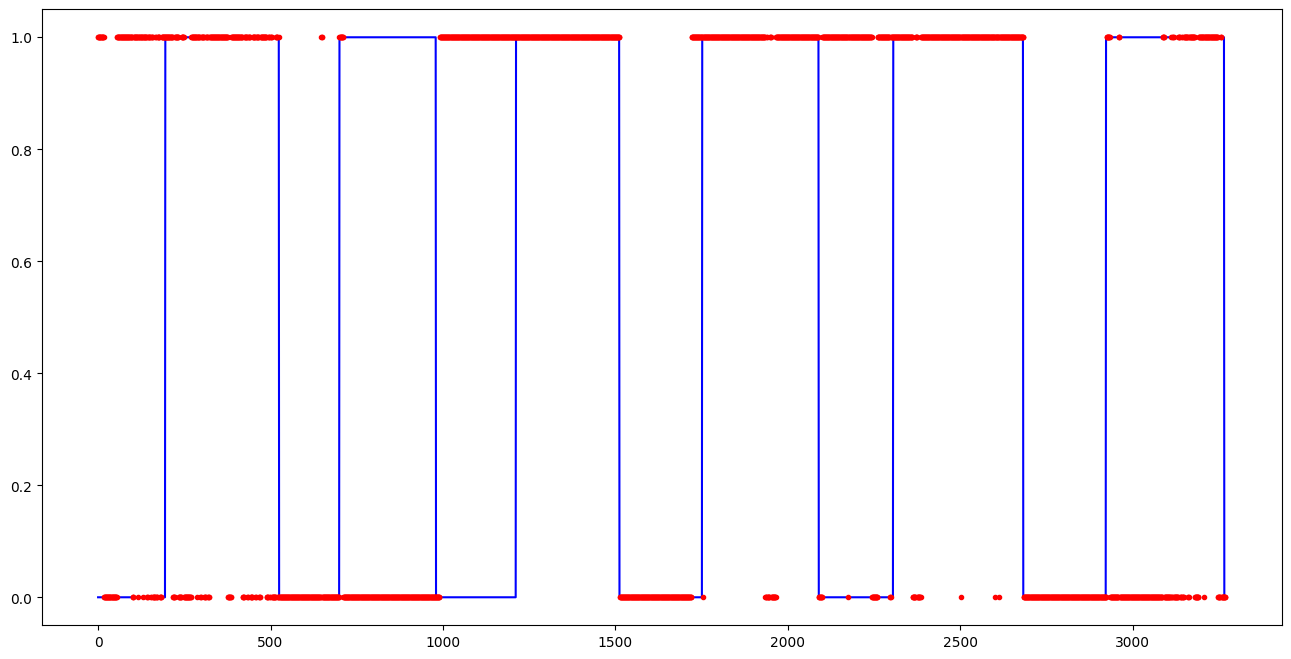

Subject 20
              precision    recall  f1-score   support

           0       0.59      0.51      0.55      1509
           1       0.63      0.70      0.66      1761

    accuracy                           0.61      3270
   macro avg       0.61      0.61      0.60      3270
weighted avg       0.61      0.61      0.61      3270



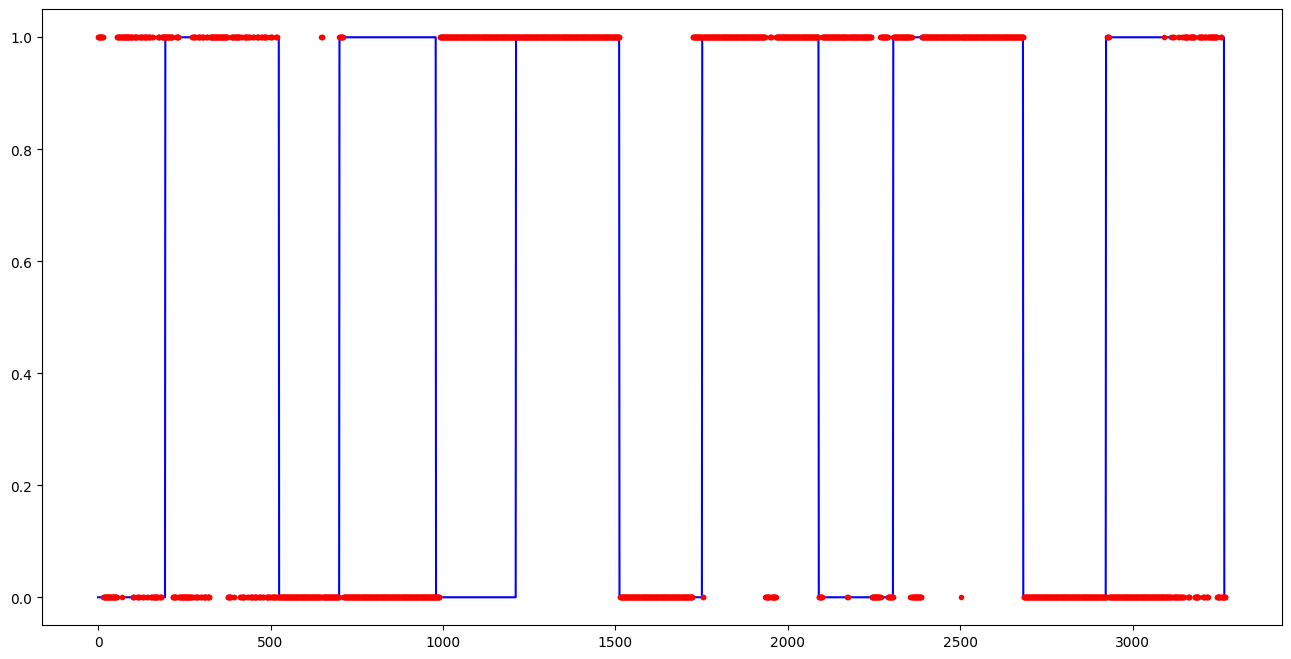

Subject 21
              precision    recall  f1-score   support

           0       0.60      0.51      0.55      1516
           1       0.62      0.70      0.66      1754

    accuracy                           0.61      3270
   macro avg       0.61      0.61      0.61      3270
weighted avg       0.61      0.61      0.61      3270



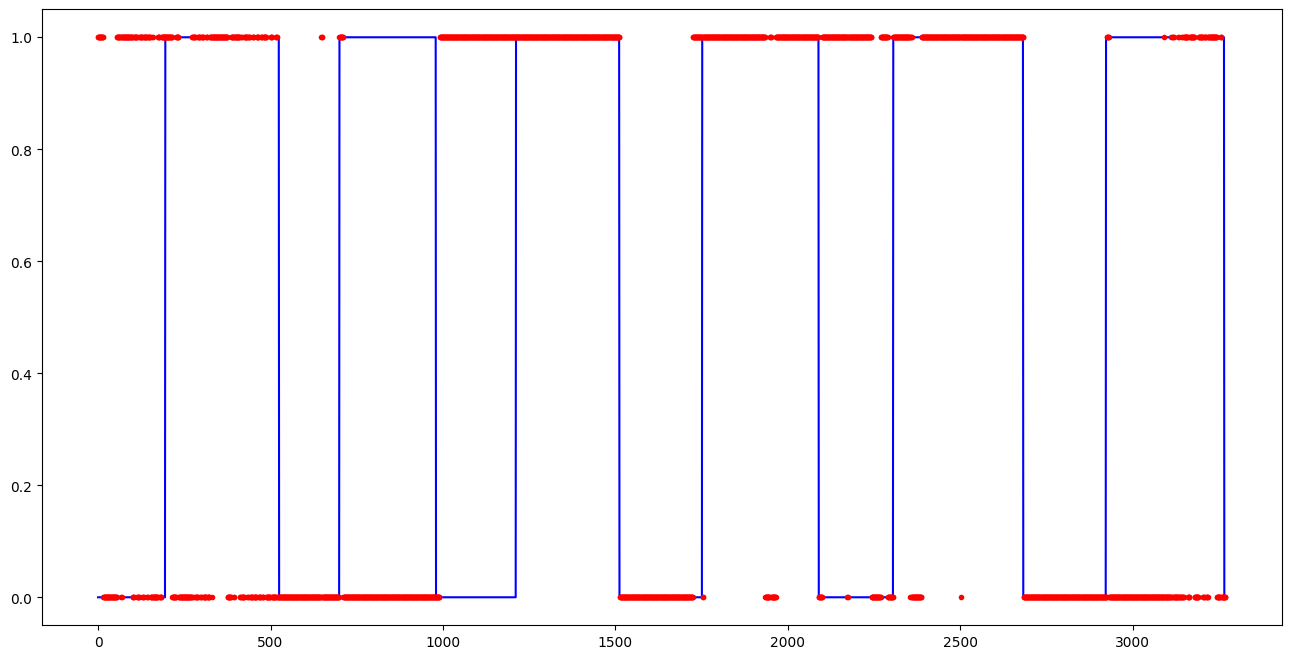

In [16]:
show_results(xgb_preds)

In [37]:
svmx, svmy = test_values(fee)
knnx, knny = test_values(cnn)

In [38]:
cv_train(fee, svmx, svmy, sms_preds, c_svm)
cv_train(cnn, knnx, knny, emp_preds, c_knn)

Subject 11
              precision    recall  f1-score   support

         0.0       0.68      0.69      0.69      1398
         1.0       0.79      0.79      0.79      2112

    accuracy                           0.75      3510
   macro avg       0.74      0.74      0.74      3510
weighted avg       0.75      0.75      0.75      3510



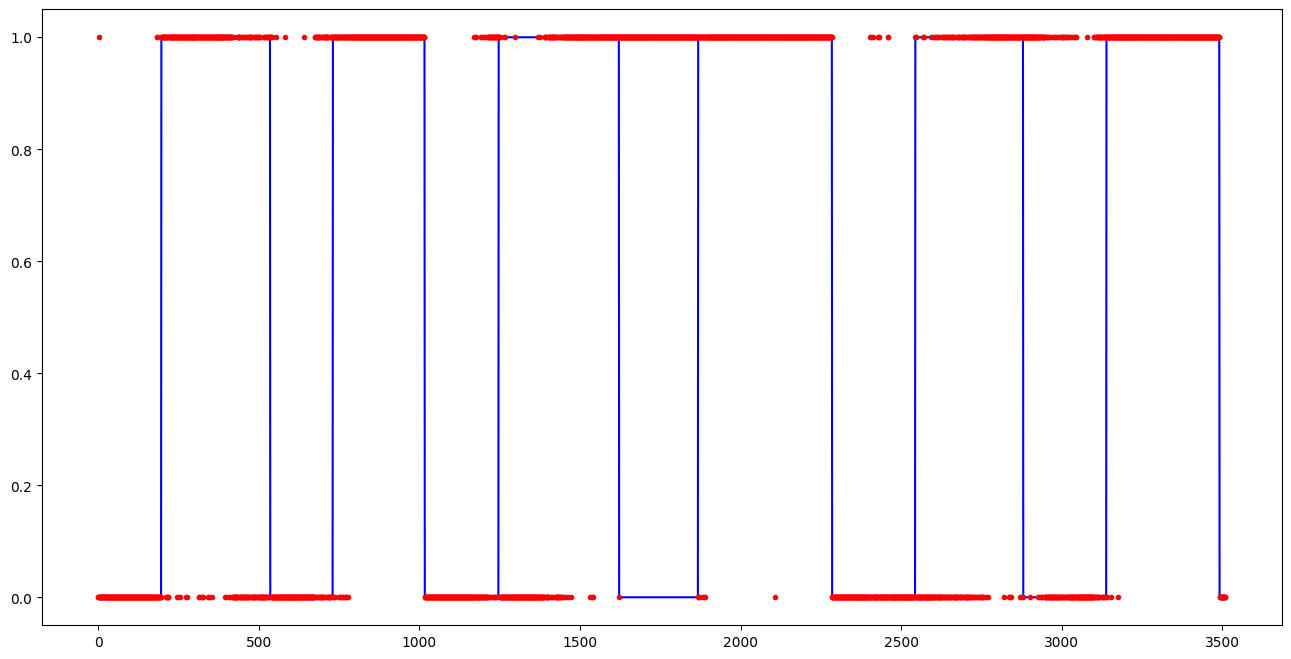

Subject 12
              precision    recall  f1-score   support

         0.0       0.66      0.69      0.68      1345
         1.0       0.80      0.78      0.79      2165

    accuracy                           0.75      3510
   macro avg       0.73      0.74      0.73      3510
weighted avg       0.75      0.75      0.75      3510



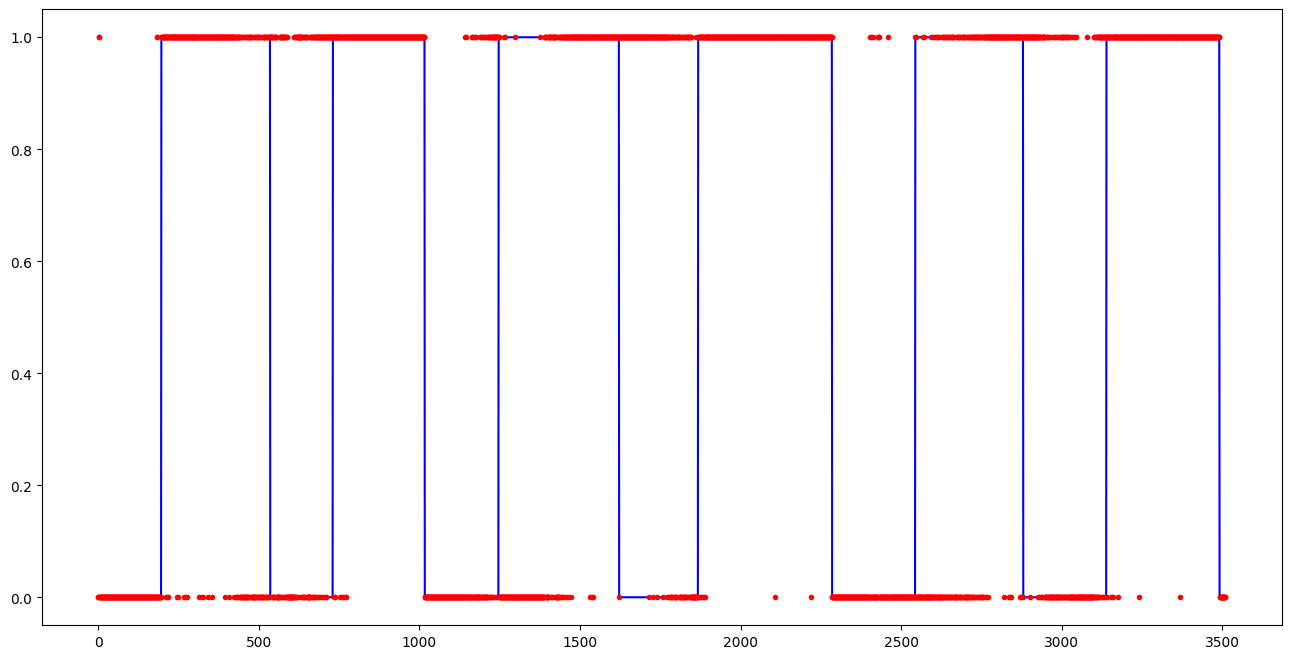

Subject 13
              precision    recall  f1-score   support

         0.0       0.60      0.66      0.63      1292
         1.0       0.79      0.75      0.77      2218

    accuracy                           0.71      3510
   macro avg       0.70      0.70      0.70      3510
weighted avg       0.72      0.71      0.72      3510



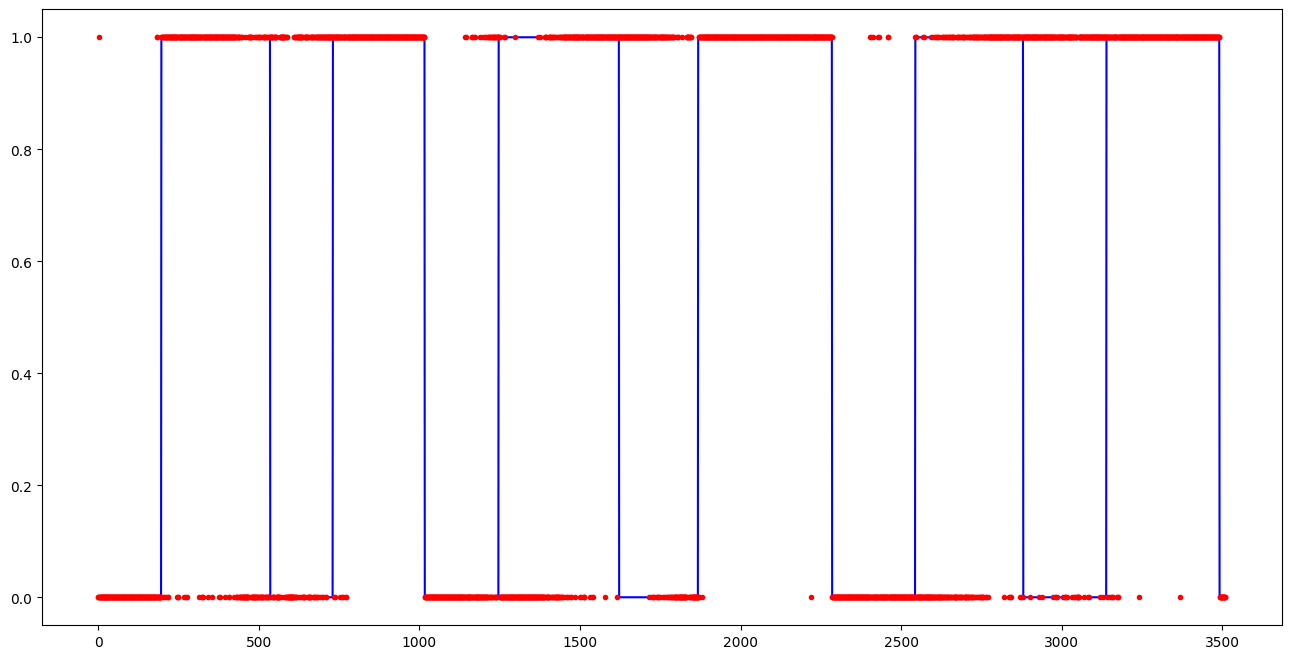

Subject 14
              precision    recall  f1-score   support

         0.0       0.66      0.69      0.68      1346
         1.0       0.80      0.78      0.79      2164

    accuracy                           0.75      3510
   macro avg       0.73      0.74      0.74      3510
weighted avg       0.75      0.75      0.75      3510



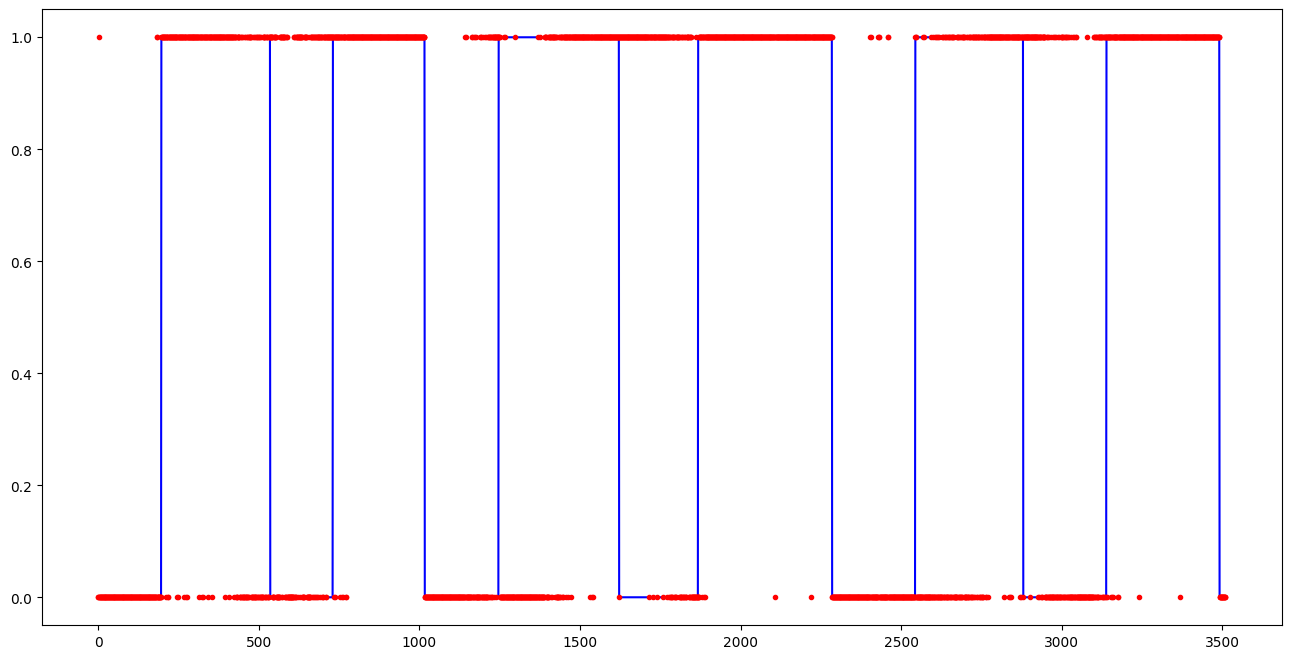

Subject 15
              precision    recall  f1-score   support

         0.0       0.66      0.69      0.68      1345
         1.0       0.80      0.78      0.79      2165

    accuracy                           0.75      3510
   macro avg       0.73      0.74      0.74      3510
weighted avg       0.75      0.75      0.75      3510



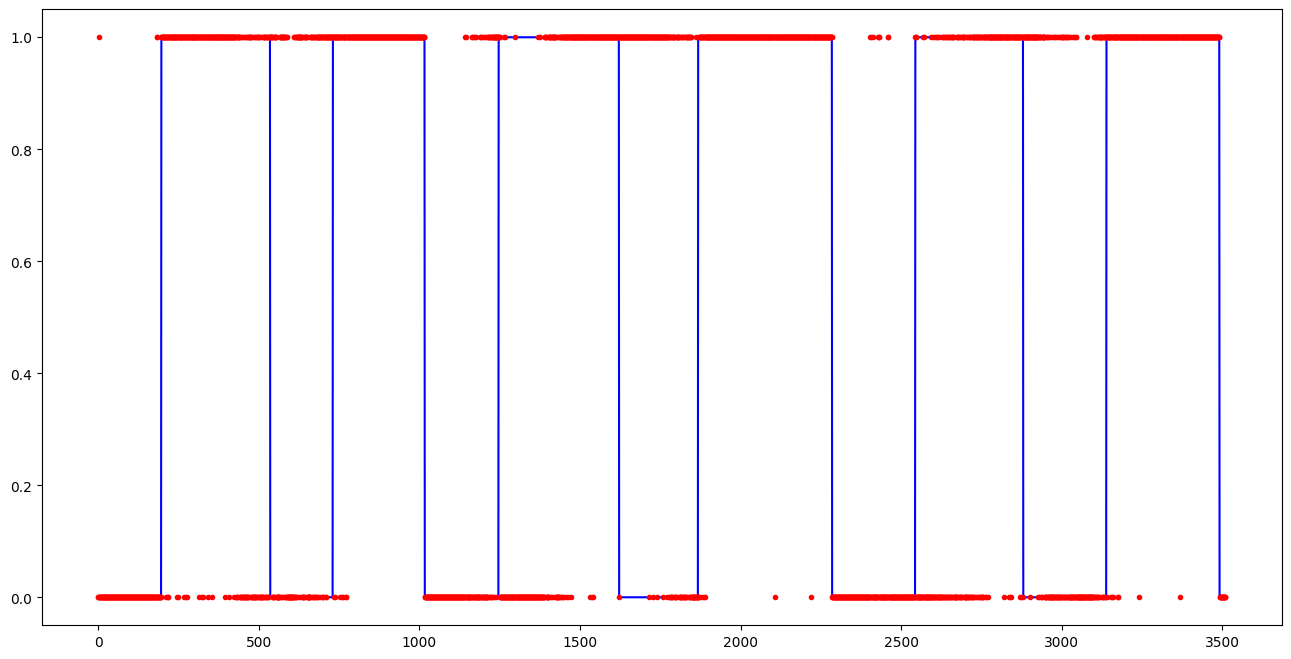

Subject 16
              precision    recall  f1-score   support

         0.0       0.66      0.68      0.67      1368
         1.0       0.79      0.78      0.78      2142

    accuracy                           0.74      3510
   macro avg       0.73      0.73      0.73      3510
weighted avg       0.74      0.74      0.74      3510



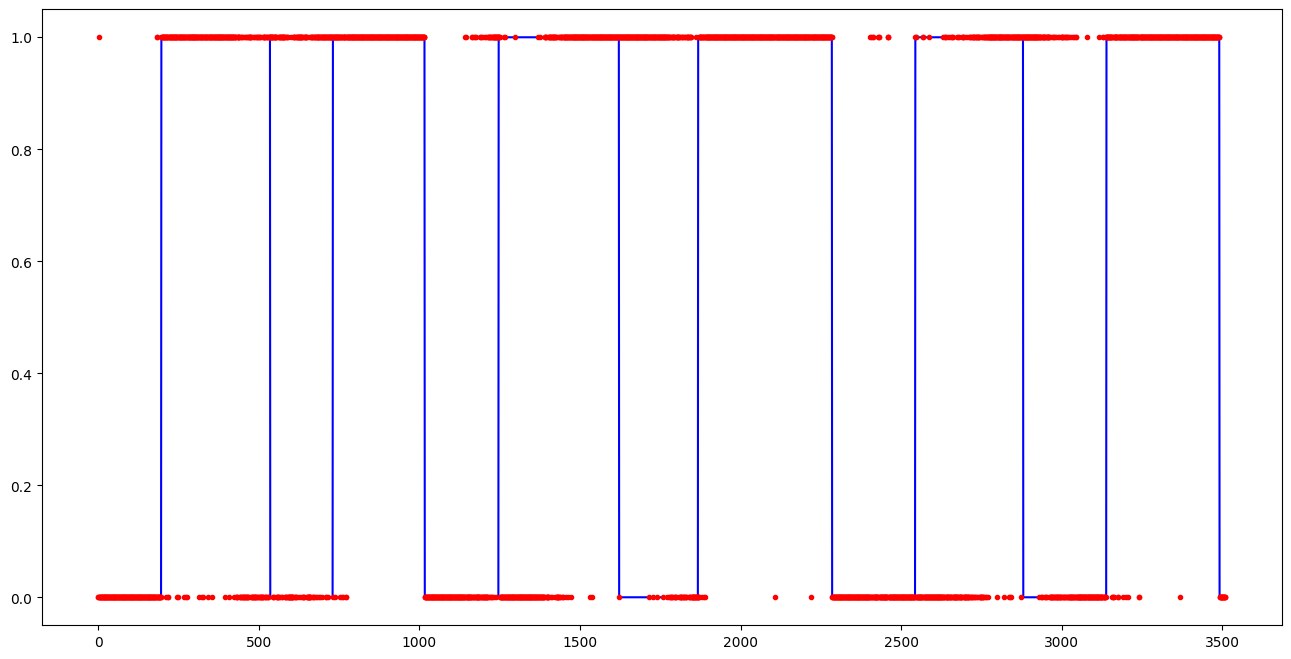

Subject 17
              precision    recall  f1-score   support

         0.0       0.69      0.72      0.70      1348
         1.0       0.82      0.80      0.81      2162

    accuracy                           0.77      3510
   macro avg       0.75      0.76      0.76      3510
weighted avg       0.77      0.77      0.77      3510



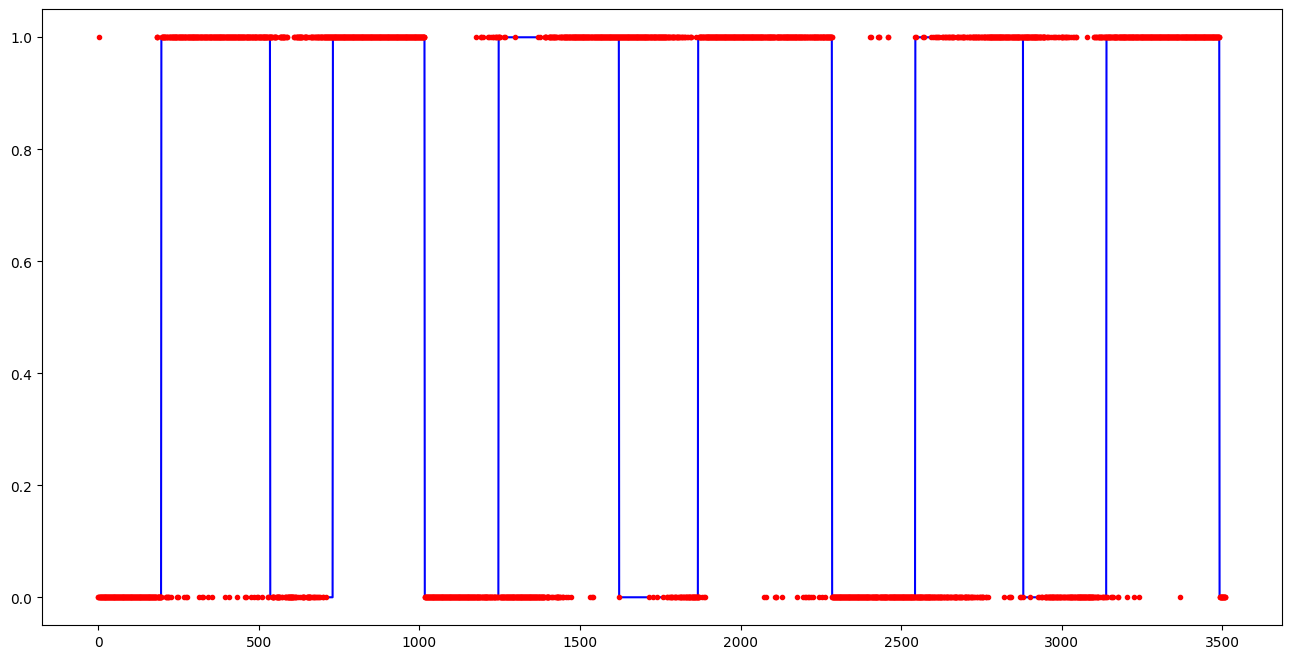

Subject 18
              precision    recall  f1-score   support

         0.0       0.69      0.70      0.69      1388
         1.0       0.80      0.79      0.80      2122

    accuracy                           0.75      3510
   macro avg       0.74      0.74      0.74      3510
weighted avg       0.75      0.75      0.75      3510



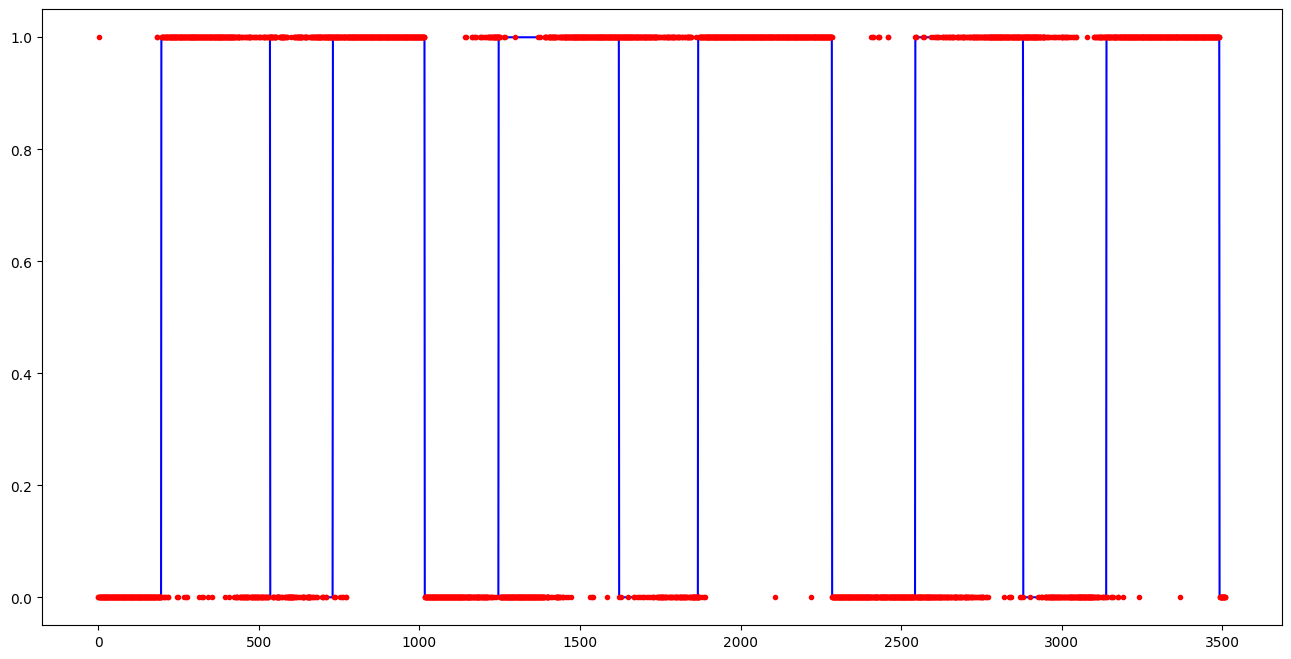

Subject 20
              precision    recall  f1-score   support

         0.0       0.67      0.70      0.68      1337
         1.0       0.81      0.78      0.80      2173

    accuracy                           0.75      3510
   macro avg       0.74      0.74      0.74      3510
weighted avg       0.76      0.75      0.75      3510



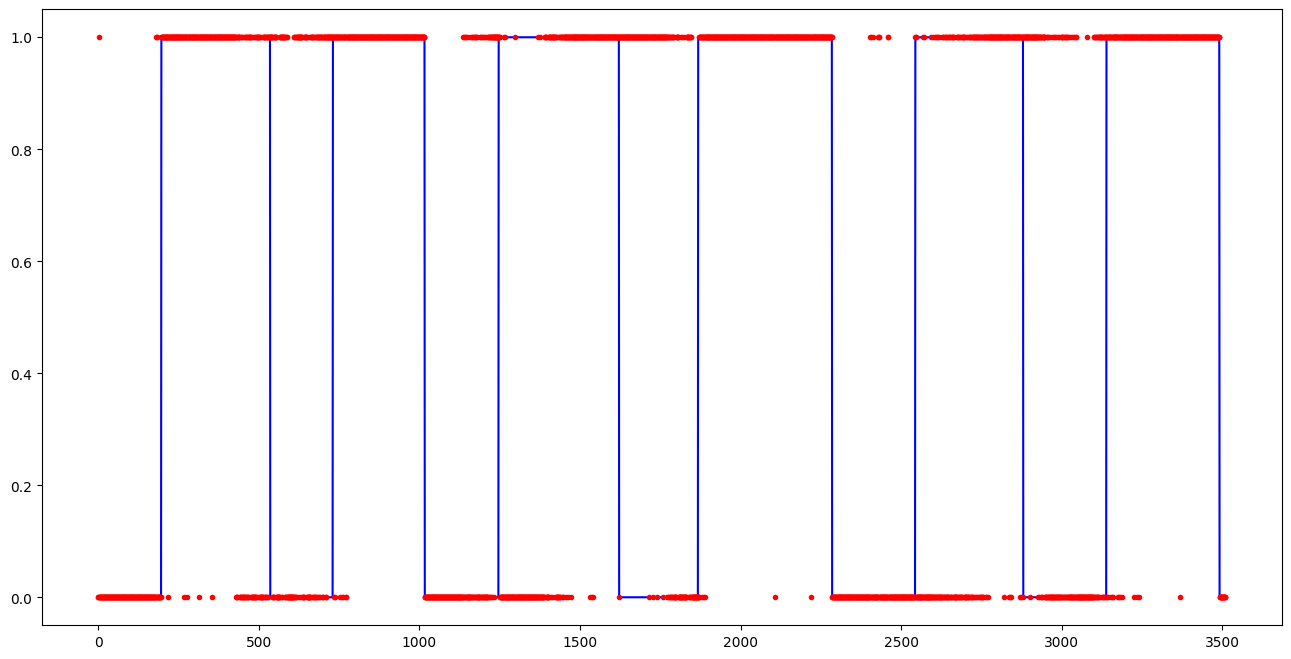

Subject 21
              precision    recall  f1-score   support

         0.0       0.72      0.79      0.75      1270
         1.0       0.88      0.82      0.85      2240

    accuracy                           0.81      3510
   macro avg       0.80      0.81      0.80      3510
weighted avg       0.82      0.81      0.81      3510



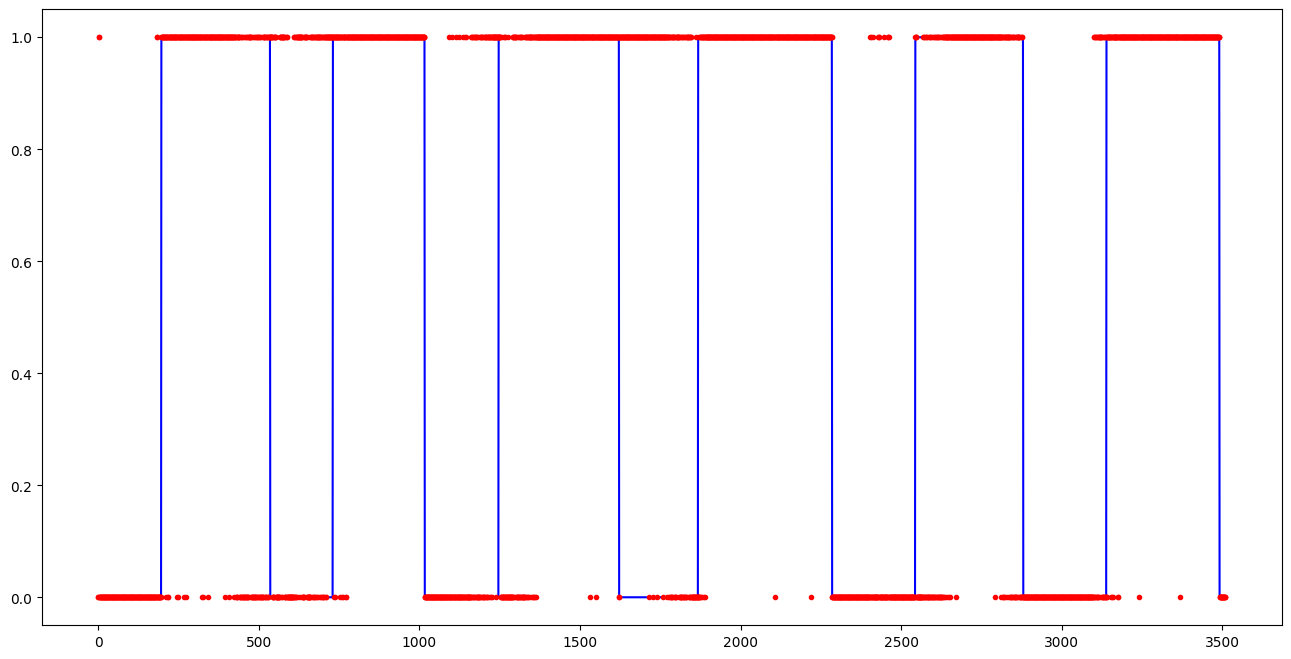

In [39]:
show_results(emp_preds)

Subject 11
              precision    recall  f1-score   support

         0.0       0.90      0.91      0.90      1288
         1.0       0.94      0.93      0.94      1982

    accuracy                           0.92      3270
   macro avg       0.92      0.92      0.92      3270
weighted avg       0.92      0.92      0.92      3270



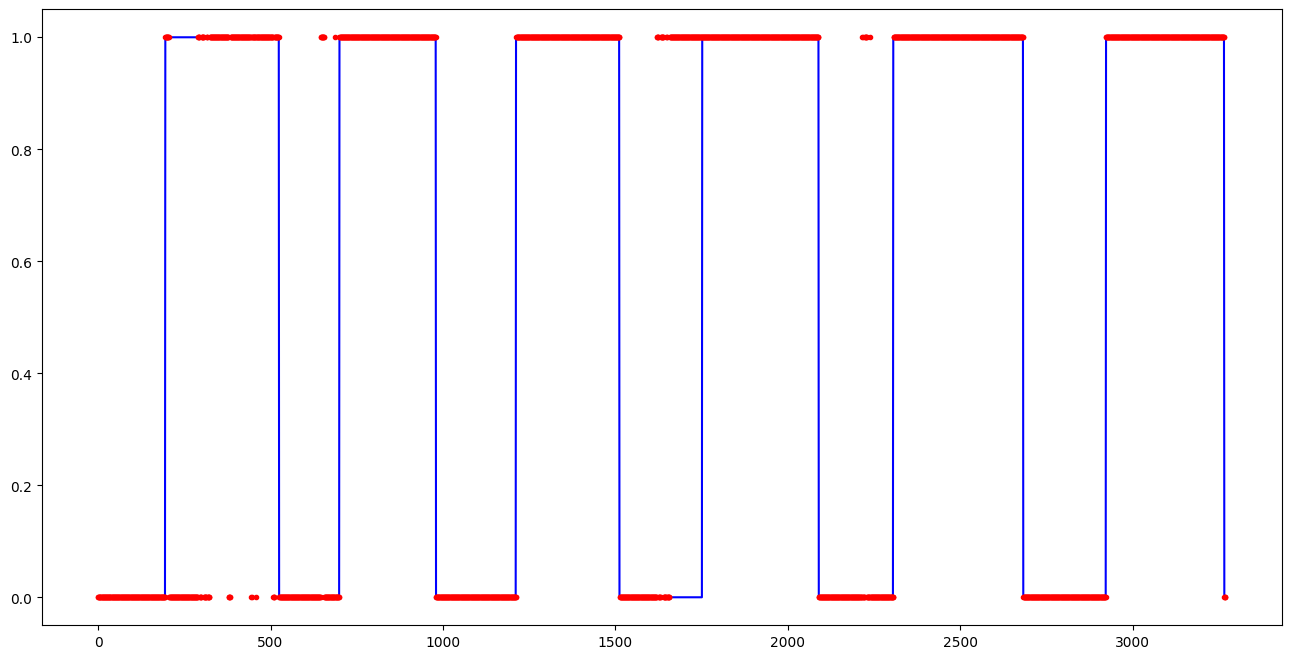

Subject 12
              precision    recall  f1-score   support

         0.0       0.89      0.94      0.91      1230
         1.0       0.96      0.93      0.95      2040

    accuracy                           0.93      3270
   macro avg       0.93      0.94      0.93      3270
weighted avg       0.94      0.93      0.93      3270



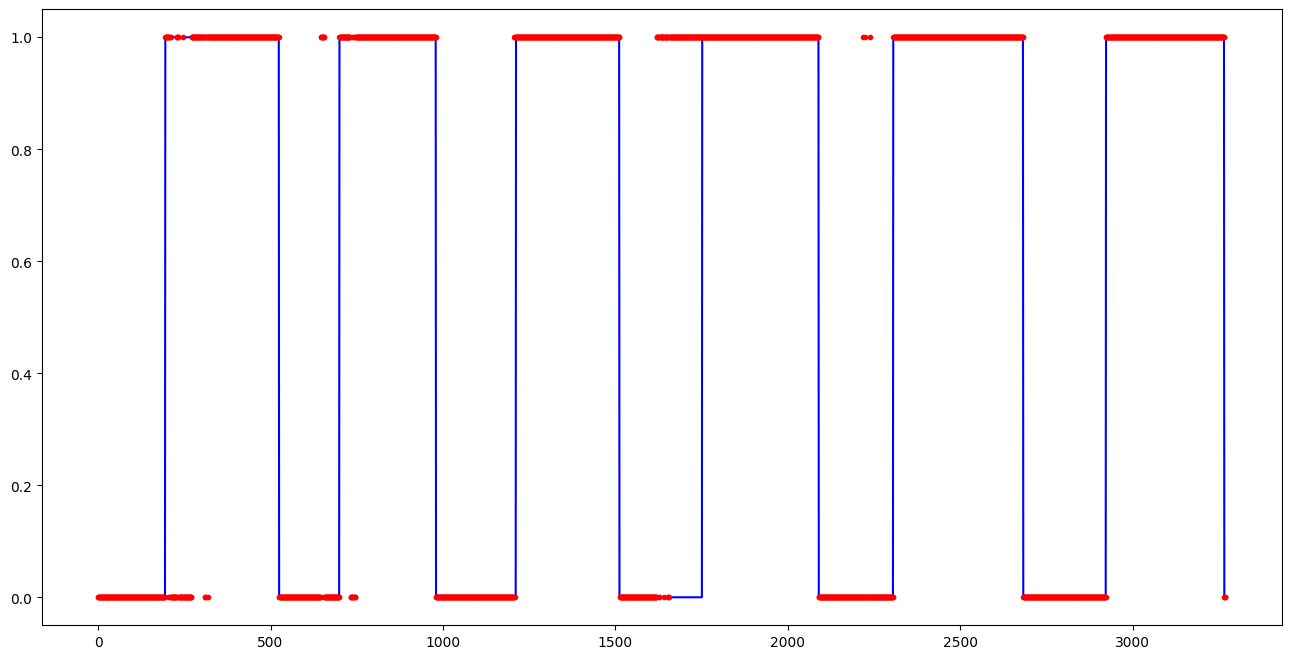

Subject 13
              precision    recall  f1-score   support

         0.0       0.88      0.82      0.85      1392
         1.0       0.88      0.92      0.90      1878

    accuracy                           0.88      3270
   macro avg       0.88      0.87      0.87      3270
weighted avg       0.88      0.88      0.88      3270



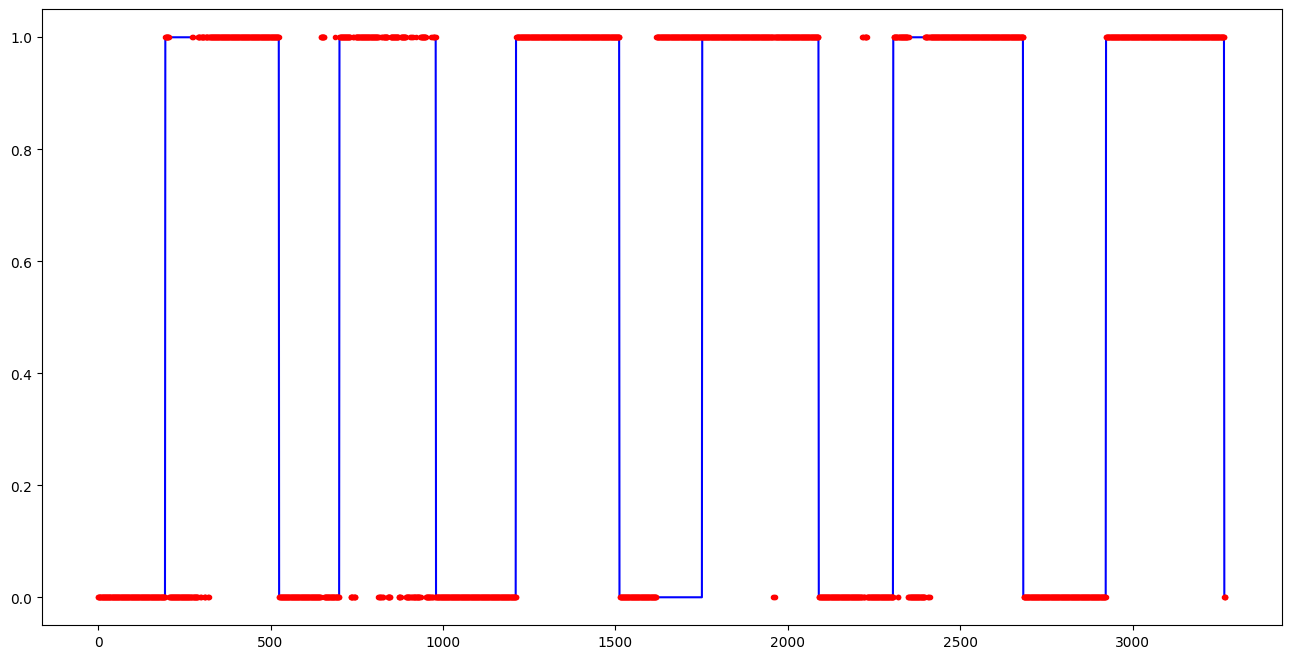

Subject 14
              precision    recall  f1-score   support

         0.0       0.90      0.87      0.88      1347
         1.0       0.91      0.93      0.92      1923

    accuracy                           0.91      3270
   macro avg       0.90      0.90      0.90      3270
weighted avg       0.91      0.91      0.91      3270



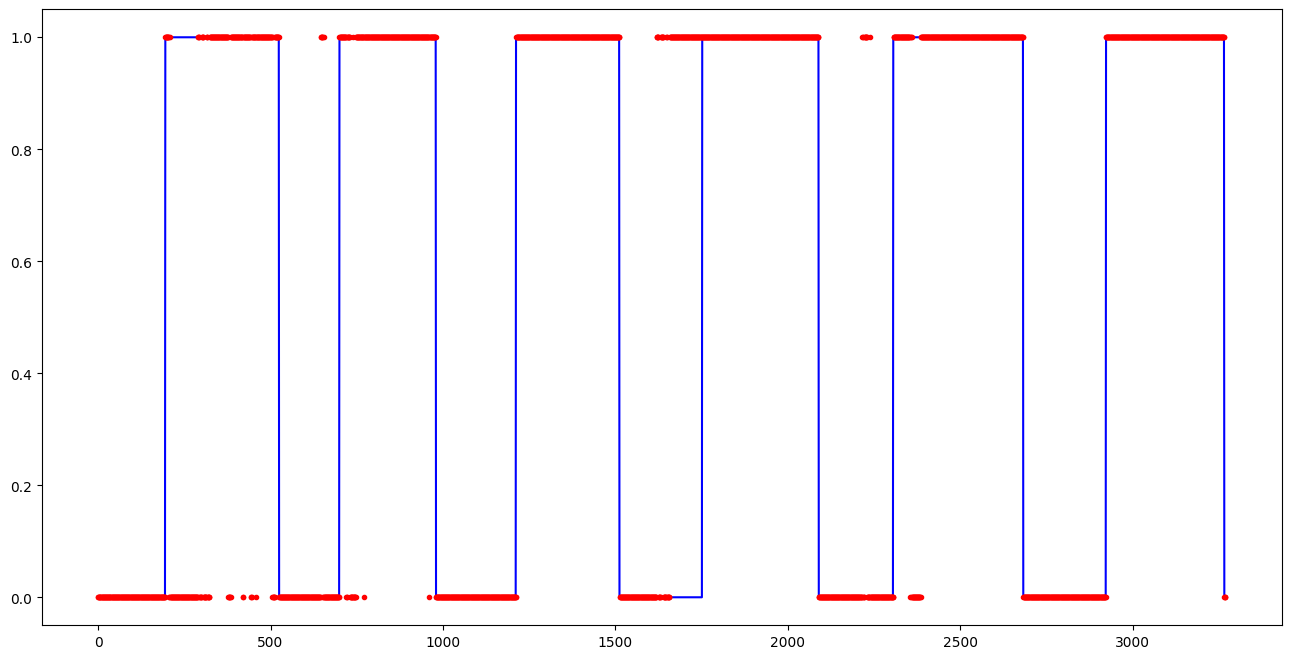

Subject 15
              precision    recall  f1-score   support

         0.0       0.89      0.91      0.90      1272
         1.0       0.94      0.93      0.93      1998

    accuracy                           0.92      3270
   macro avg       0.91      0.92      0.91      3270
weighted avg       0.92      0.92      0.92      3270



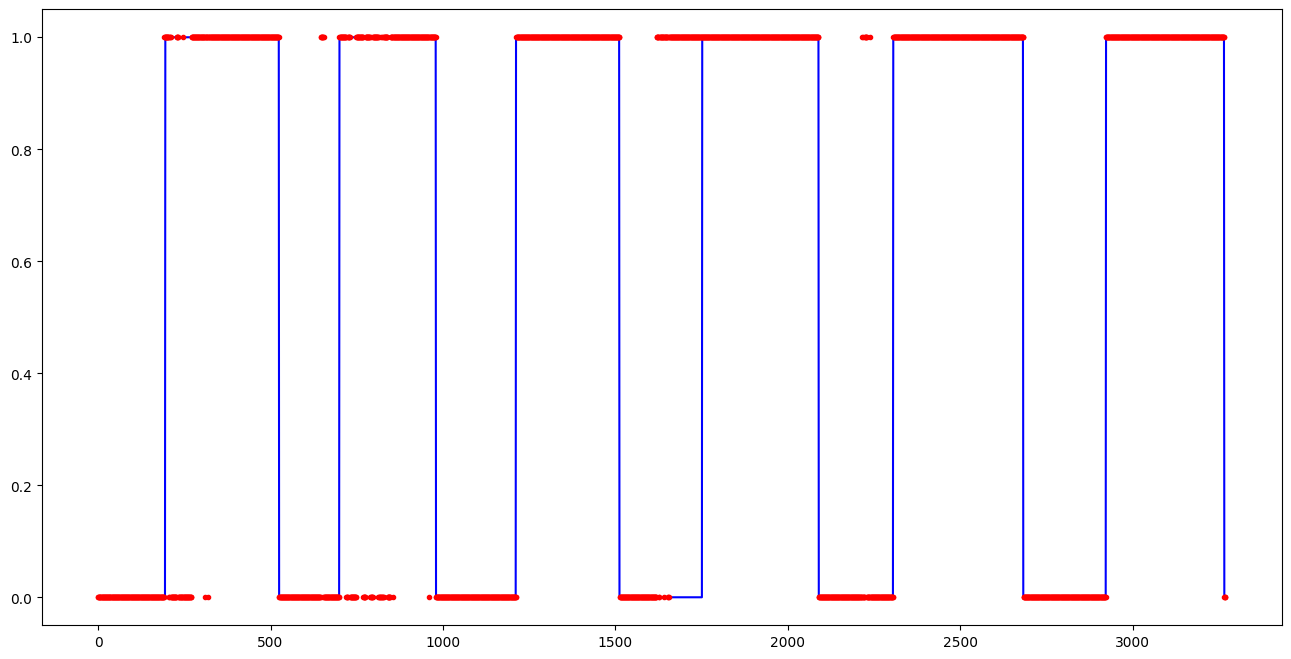

Subject 16
              precision    recall  f1-score   support

         0.0       0.87      0.98      0.92      1159
         1.0       0.99      0.92      0.95      2111

    accuracy                           0.94      3270
   macro avg       0.93      0.95      0.94      3270
weighted avg       0.94      0.94      0.94      3270



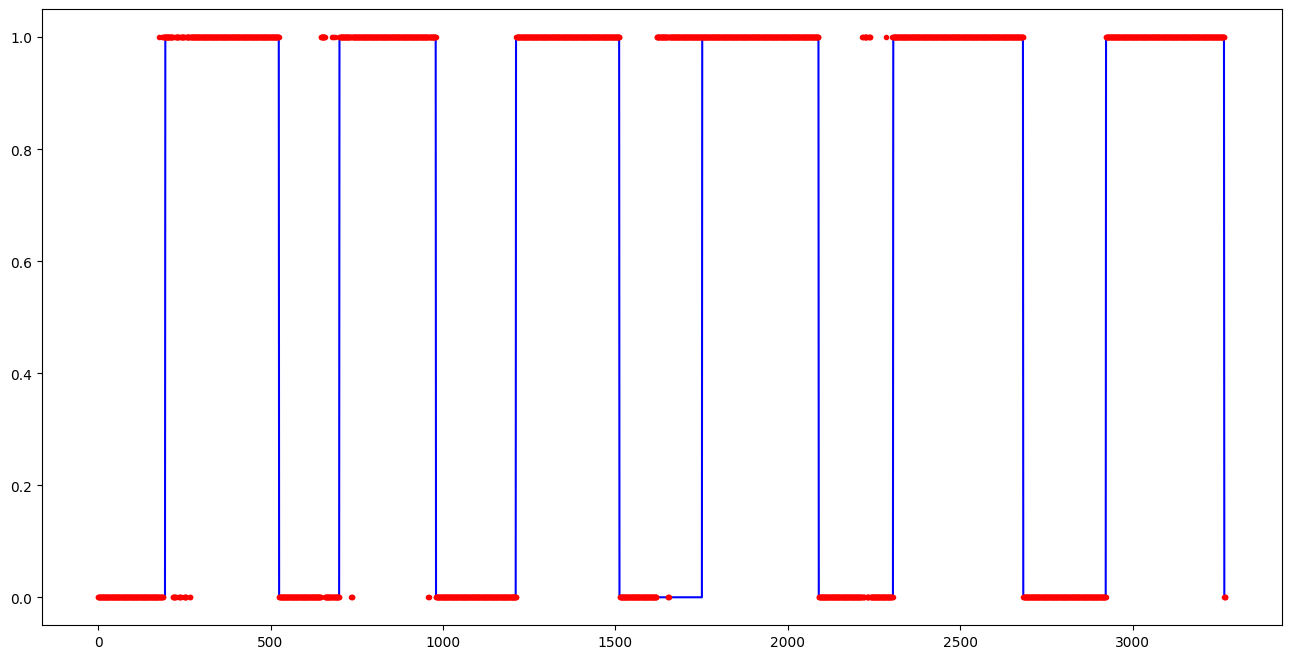

Subject 17
              precision    recall  f1-score   support

         0.0       0.85      0.91      0.88      1208
         1.0       0.95      0.90      0.92      2062

    accuracy                           0.91      3270
   macro avg       0.90      0.91      0.90      3270
weighted avg       0.91      0.91      0.91      3270



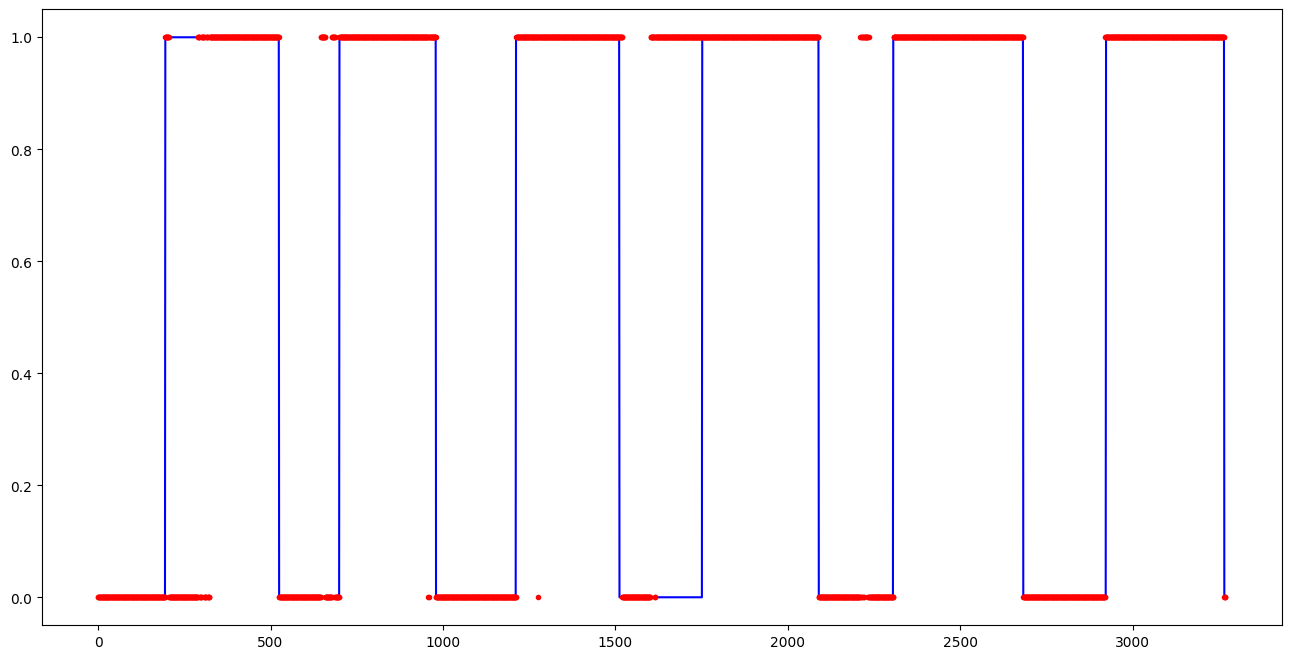

Subject 18
              precision    recall  f1-score   support

         0.0       0.83      0.89      0.86      1217
         1.0       0.93      0.89      0.91      2053

    accuracy                           0.89      3270
   macro avg       0.88      0.89      0.88      3270
weighted avg       0.89      0.89      0.89      3270



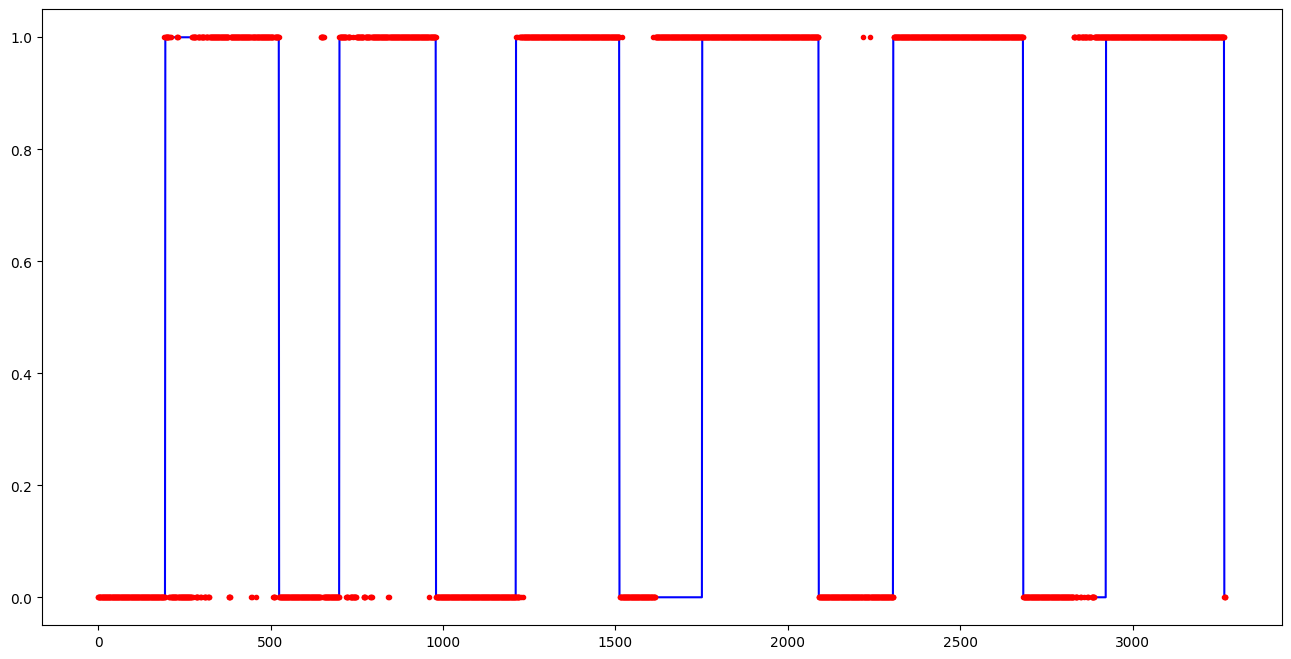

Subject 20
              precision    recall  f1-score   support

         0.0       0.90      0.91      0.90      1288
         1.0       0.94      0.93      0.94      1982

    accuracy                           0.92      3270
   macro avg       0.92      0.92      0.92      3270
weighted avg       0.92      0.92      0.92      3270



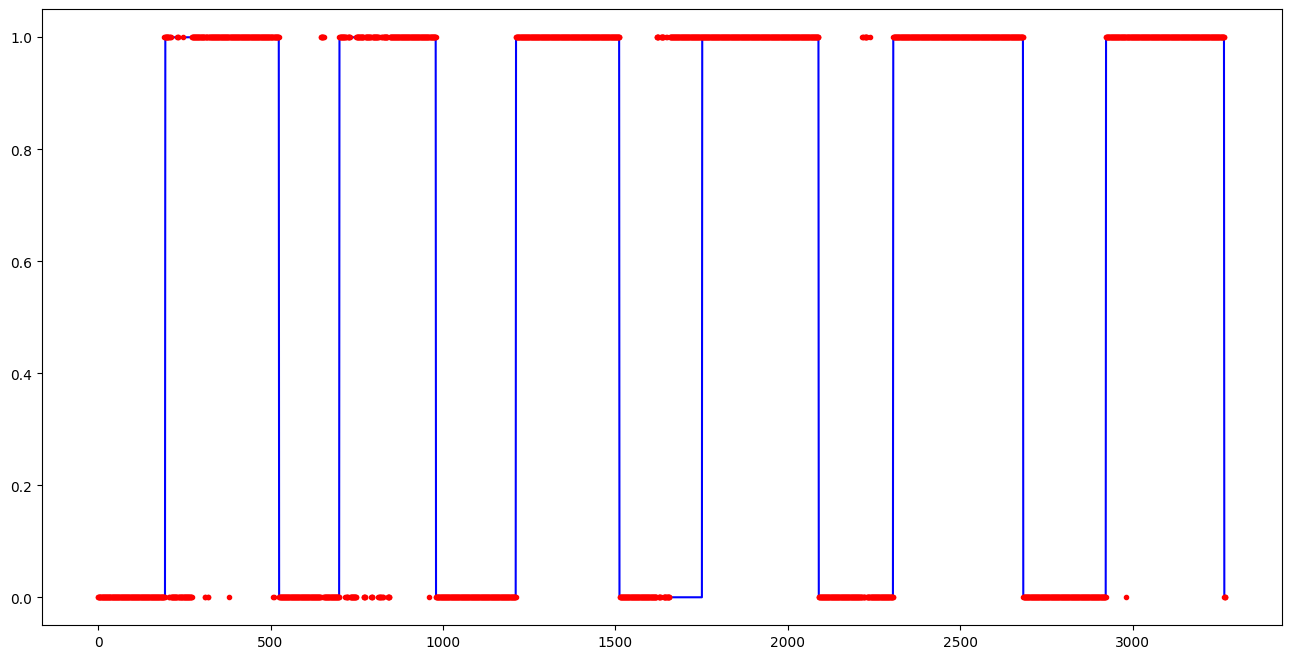

Subject 21
              precision    recall  f1-score   support

         0.0       0.88      0.92      0.90      1244
         1.0       0.95      0.92      0.94      2026

    accuracy                           0.92      3270
   macro avg       0.92      0.92      0.92      3270
weighted avg       0.93      0.92      0.93      3270



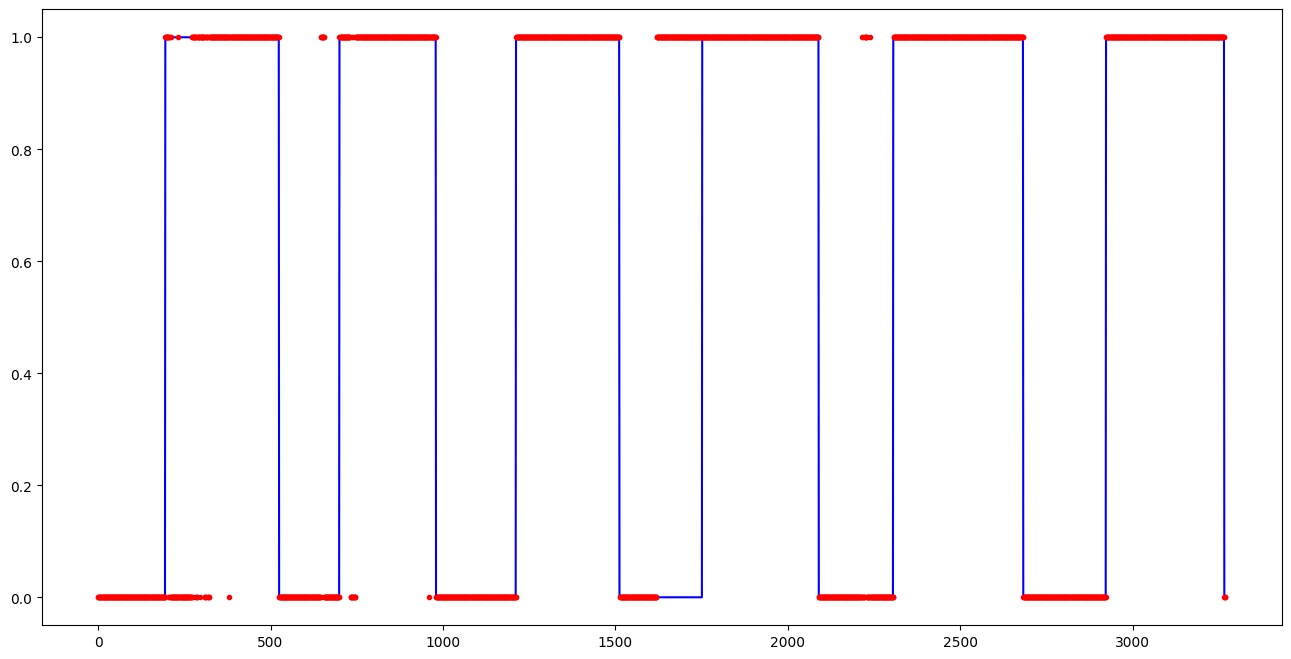

In [33]:
show_results(sms_preds)

In [ ]:
ppg.show_filtered(5, 2, [0.1, 9])

In [ ]:
ppg.show_dx1(8)

In [ ]:
wi = []
for p in ppg._ms_points:
  if p < 750:
    wi.append(0)

len(wi)

In [ ]:
np.median([189, 12, 12, 14])

In [ ]:
ppg.show_dx(5)

In [ ]:
ppg.show_dx(2, 2)

In [ ]:
ppg.show_dx(5, 3)

In [ ]:
emp.show(5)

In [ ]:
emp.show(0)

In [ ]:
emp.show_filtered(0, 2, [0.1, 10])

In [ ]:
eeg.show(11)

In [ ]:
ppg.show(11)

In [ ]:
emp.show(11)

In [ ]:
eda.show(11)

In [5]:
def ft(seconds):
  return f"{seconds // 60}\'{seconds % 60}\""

In [6]:
stat = pd.DataFrame(columns=["volunteer", "sms_na", "sms_total", "sms_recording", "emp_na", "emp_total", "emp_recording", "eda_na", "eda_total", "eda_recording", "eeg_na", "eeg_total", "eeg_recording"])
vols = os.listdir(survey_path)
vols.sort()
for v in vols:
  metrics = {"volunteer": v,
             'sms_min': 0, 'sms_max': 0, 'sms_mean': 0, 'sms_std': 0,
             'emp_min': 0, 'emp_max': 0, 'emp_mean': 0, 'emp_std': 0,
             'eda_min': 0, 'eda_max': 0, 'eda_mean': 0, 'eds_std': 0,
             'eeg_min': 0, 'eeg_max': 0, 'eeg_mean': 0, 'eeg_std': 0,
             'sms_ratio': 0,'emp_ratio': 0,'eda_ratio': 0,'eeg_ratio': 0, 'sms_t': '', 'emp_t': '', 'eda_t': '', 'eeg_t': '', "sms_na": 0, "sms_total": 0, "sms_recording": 0, "emp_na": 0, "emp_total": 0, "emp_recording": 0, "eda_na": 0, "eda_total": 0, "eda_recording": 0, "eeg_na": 0, "eeg_total": 0, "eeg_recording": 0}
  samsung = pd.read_csv(os.path.join(survey_path, v, "samsung_ppg.csv"))
  emp = pd.read_csv(os.path.join(survey_path, v, "empatica_ppg.csv"))
  eda = pd.read_csv(os.path.join(survey_path, v, "empatica_eda.csv"))
  eeg = pd.read_csv(os.path.join(survey_path, v, "muse_eeg.csv"))
  # print(f"Volunteer {v}")

  total = samsung.shape[0]
  metrics["sms_total"] = total
  na = samsung.isnull().any(axis=1).sum()
  metrics["sms_na"] = na
  seconds = total // 25
  metrics["sms_recording"] = seconds
  metrics["sms_t"] = ft(seconds)
  cl_s = len(samsung.where(samsung['y'] == 1).dropna())
  bl_s = len(samsung.where(samsung['y'] == 0).dropna())
  metrics['sms_min'] = round(samsung['ppg'].min(), 3).__str__()
  metrics['sms_max'] = round(samsung['ppg'].max(), 2).__str__()
  metrics['sms_mean'] = round(samsung['ppg'].mean(), 3).__str__()
  metrics['sms_std'] = round(samsung['ppg'].std(), 3).__str__()
  s_ratio = round(cl_s / bl_s, 3)
  metrics['sms_ratio'] = s_ratio
  # print(f"  PPG| na: {na} | total: {total} | ratio: {s_ratio} | {seconds // 60}\' {seconds % 60}\"")

  total = emp.shape[0]
  metrics["emp_total"] = total
  na = emp.isnull().any(axis=1).sum()
  metrics["emp_na"] = na
  cl = len(emp.where(emp['y'] == 1).dropna())
  bl = len(emp.where(emp['y'] == 0).dropna())
  seconds = total // 64
  metrics["emp_t"] = ft(seconds)
  metrics["emp_recording"] = seconds
  emp_ratio = round(cl / bl, 3)
  metrics['emp_ratio'] = emp_ratio
  metrics['emp_min'] = round(emp['ppg'].min(), 3).__str__()
  metrics['emp_max'] = round(emp['ppg'].max(), 3).__str__()
  metrics['emp_mean'] = round(emp['ppg'].mean(), 3).__str__()
  metrics['emp_std'] = round(emp['ppg'].std(), 3).__str__()
  # print(f"  EMP| na: {na} | total: {total} | ratio: {emp_ratio} | {seconds // 60}\' {seconds % 60}\"")

  total = eda.shape[0]
  metrics["eda_total"] = total
  na = eda.isnull().any(axis=1).sum()
  cl = len(eda.where(eda['y'] == 1).dropna())
  bl = len(eda.where(eda['y'] == 0).dropna())
  metrics["eda_na"] = na
  seconds = total // 4
  metrics["eda_t"] = ft(seconds)
  metrics["eda_recording"] = seconds
  eda_ratio = round(cl / bl, 3)
  metrics['eda_ratio'] = eda_ratio
  metrics['eda_min'] = round(eda['eda'].min(), 3).__str__()
  metrics['eda_max'] = round(eda['eda'].max(), 3).__str__()
  metrics['eda_mean'] = round(eda['eda'].mean(), 3).__str__()
  metrics['eda_std'] = round(eda['eda'].std(), 3).__str__()
  # print(f"  EDA| na: {na} | total: {total} | ratio: {eda_ratio} | {seconds // 60}\' {seconds % 60}\"")

  total = eeg.shape[0]
  metrics["eeg_total"] = total
  na = eeg.isnull().any(axis=1).sum()
  metrics["eeg_na"] = na
  cl = len(eeg.where(eeg['y'] == 1).dropna())
  bl = len(eeg.where(eeg['y'] == 0).dropna())
  seconds = total // 256
  metrics["eeg_t"] = ft(seconds)
  metrics["eeg_recording"] = seconds
  eeg_ratio = round(cl / (bl | 1), 3)
  metrics['eeg_ratio'] = eeg_ratio
  # print(f"  EEG| na: {na} | total: {total} | ratio: {eeg_ratio} | {seconds // 60}\' {seconds % 60}\"")

  latex = '''\
    \\midrule
    \\textbf {{Voluntário {volunteer}}} \\\\
      Samsung PPG  & {sms_t}    & {sms_ratio}    & {sms_total}  & {sms_na} & {sms_min} & {sms_max} & {sms_mean} & {sms_std}  \\\\
      Empatica PPG  & {emp_t}    & {emp_ratio}    & {emp_total}  & {emp_na} & {emp_min} & {emp_max} & {emp_mean} & {emp_std} \\\\
      Empatica EDA  & {eda_t}    & {eda_ratio}    & {eda_total}  & {eda_na}& {eda_min} & {eda_max} & {eda_mean} & {eda_std}  \\\\
      Muse EEG  & {eeg_t}    & {eeg_ratio}    & {eeg_total}  & {eeg_na} & N/A & N/A & N/A & N/A \\\\
  '''.format(**metrics)
  print(latex)

  # row = pd.DataFrame(data=metrics, index=[0])
  # stat = pd.concat([stat, row], ignore_index=True)


    \midrule
    \textbf {Voluntário 11} \\
      Samsung PPG  & 13'38"    & 1.259    & 20474  & 0 & 1823074.0 & 2414563.0 & 2099593.878 & 127453.333  \\
      Empatica PPG  & 13'35"    & 1.26    & 52174  & 0 & -239.73 & 231.78 & 0.002 & 46.877 \\
      Empatica EDA  & 13'35"    & 1.26    & 3261  & 0& 0.231 & 0.569 & 0.472 & 0.064  \\
      Muse EEG  & 6'29"    & 0.079    & 99658  & 0 & N/A & N/A & N/A & N/A \\
  
    \midrule
    \textbf {Voluntário 12} \\
      Samsung PPG  & 16'11"    & 1.69    & 24278  & 0 & 1315932.0 & 2520418.0 & 1854011.781 & 247407.574  \\
      Empatica PPG  & 17'5"    & 1.695    & 65631  & 0 & -873.33 & 537.78 & 0.115 & 73.405 \\
      Empatica EDA  & 17'4"    & 1.7    & 4099  & 0& 0.256 & 0.847 & 0.514 & 0.149  \\
      Muse EEG  & 15'17"    & 1.553    & 234901  & 0 & N/A & N/A & N/A & N/A \\
  
    \midrule
    \textbf {Voluntário 13} \\
      Samsung PPG  & 14'33"    & 1.886    & 21831  & 0 & 1757389.0 & 2379034.0 & 1980817.224 & 130287.251  \\
      Empat

In [ ]:
for row in stat.iterrows():
  print((row[1]["eeg_na"] / row[1]["eeg_total"]) * 100)